## Content Page

1. [Problem Definition](#Contents)
    - [Introduction](#Introduction)
    - [Problem Definition](#Problem-Definition)
    - [Content and Explaination](#Content-&-Explanation)

2. [Datasets](#Importing-Packages)
    - [Importing Packages](#Importing-Packages)
    - [Data](#Data)
    - [Data Types](#Data-type)
    - [Duplicates](#Duplicates)
    - [Missing Values](#Missing-Values)

3. [Exploratory Data Analysis (On application.csv)](#Exploratory-Data-Analysis)
    - [Exploring Categorical Variables](#Exploring-Categorical-Variables)
    - [Exploring Numerical Variables](#Exploring-Numerical-Variables)
    - [Data Cleaning](#Data-Cleaning)
        - [Dropping Values](#Dropping-Values)
        - [Converting Days to Years](#Converting-Days-to-Years)
        - [Fixing Occupation Type](#Fixing-Occupation-Type)
        - [Converting Data Types](#Converting-Data-Types)
        - [Outliers](#Outliers)

4. [Exploratory Data Analysis (on credit_record.csv)](#Exploratory-Analysis)
    - [Exploring Variables](#Exploratory-Analysis)
    - [Data Cleaning](#Data-Cleaning-2)
        - [Convert Categorical Variable](Converting-Categorical-Variable)
        - [Aggregation](#Using-Aggreation-to-size-down-to-a-binary-form-of-dataset)
        
5. [Merging Multiple Data Sources](#Merging-credit_record-and-application_record)

6. [Data Visualisation](#Data-Visualisation)

7. [Determine Best Predictor](#Conducting-Train-test-split-to-determine-the-best-predictors)
    - [Gender](#Client's-Gender)
    - [Cars](#Client's-possession-of-Cars)
    - [Property](#Client's-posssession-of-Property)
    - [Children Count](#Client's-number-of-Children)
    - [Family Member Count](#Client's-number-of-Family-Member)
    - [Age and Years Employed](#Client's-Age-and-Years-Employed)
    - [Employment Status](#Employment-Status)
    - [Occupation Type](#Occupation-Type)
    - [Education Type](#Education-Type)
    - [Housing Type](#Housing-Type)
    - [Income](#Client's-Income)

8. [OneHotEncoding](#Further-pre-processing-of-Data-for-Machine-Learning-Models)

9. [Machine Learning](#Machine-Learning-Techniques)
    - [Decision Tree Classification](#Decision-Tree-Classifier-(Before-Balancing-of-Data))
    - [SMOTE](#Balancing-Dataset-(Using-SMOTE))
    - [Random Forest](#Random-Forest-(Using-Balanced-Dataset))
    - [Logistic Regression](#Logistic-Regression)
    - [XGBoost Classification](#XGBoost-Classification)
    - [Improvements to Consider](#Extra-Improvements-:-Using-XGBoost-to-determine-the-best-Predictors-for-our-Response)  
    
10. [Conclusion](#Conclusion)

<hr style="border:2px solid gray"> </hr>

## Introduction
#### For our project, we have explored the dataset of Kaggel found [here](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)
#### We have chosen this dataset to predict the probability of future defaults and credit card loans using personal information and data provided by credit card applicants.

>Credit scores then can be produced which can objectively quantify <u>the magnitude of risk</u>. (More will be covered in our problem definition)

>This is extremely important as client's defaulting on their loans can cost banks a huge sum of money collectively hence it is also important to have a reasonably basis as to which clients pose a higher risk and which a lower risk.
Banks then are able to decide whether to issue a credit card to the applicant

<hr style="border:2px solid gray"> </hr>

## Problem Definition
### How does the various data submitted by Credit Card Applicants determine their credit scores (i.e. Clients’ Risk) based on prediction of future defaults and credit card loans?
#### We would like to define the applicants' risk based on how long it takes them to repay the loans. 
>**Good Client** vs **Bad Client**
>
>> 1. We would define **'Good Client'** as clients that either has no loans (i.e. "STATUS" = 'X'), and clients that paid their loans within 29 days (i.e. "STATUS" = 'C', '0'); i.e. low risk clients
>
>> 2. Next, we would define **'Bad Client'** client as clients that take longer than 30 days to pay off their loan ("STATUS" = '1', '2', '3', '4', '5'); i.e. high risk clients

#### We have noted that our **Response** is categorical - (either **'0' (Good Client)**, or **'1' (Bad Client)**), and would use the other variables as a **Predictor**
#### Our project's aim is to build a machine learning model to predict whether the applicant is a "Good" or "Bad" Client.

<hr style="border:2px solid gray"> </hr>

## Content & Explanation
#### File - application_record.csv
>Below are the contents and explaination for our first data set in comma-separated value

|Feature name|Explanation|
|:--|:--|
|ID|Client number|
|CODE_GENDER|Gender|
|FLAG_OWN_CAR|Is there a car|
|FLAG_OWN_REALTY|Is there a property|
|CNT_CHILDREN|Number of children|
|AMT_INCOME_TOTAL|Annual income|
|NAME_INCOME_TYPE|Income category|
|NAME_EDUCATION_TYPE|Education level|
|NAME_FAMILY_STATUS|Marital status|
|NAME_HOUSING_TYPE|Way of living|
|DAYS_BIRTH|Birthday|
|DAYS_EMPLOYED|Start date of employment|
|FLAG_MOBIL|Is there a mobile phone|
|FLAG_WORK_PHONE|Is there a work phone|
|FLAG_PHONE|Is there a phone|
|FLAG_EMAIL|Is there an email|
|OCCUPATION_TYPE|Occupation|
|CNT_FAM_MEMBERS|Family size|


#### Note:                                                                                                                     
>DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday
>
>DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

---

#### File - credit_record.csv
>Below are the contents and explaination for our first data set in comma-separated value

|Feature name|Explanation|
|:--|:--|
|ID|Client number|
|MONTHS_BALANCE|Record month|
|STATUS|Status|

#### Note:                                                                                                                     
>MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.                                                                                                     
>
>STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

<hr style="border:2px solid gray"> </hr>

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import xgboost as xgb
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

## Data 
>This chapter broadly consist of:
>> Data type
>
>> Duplicates
>
>> Missing Values

In [2]:
appRecord = pd.DataFrame(pd.read_csv('creditcard_consised/application_record.csv'))
appRecord.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [3]:
creditRecord = pd.DataFrame(pd.read_csv('creditcard_consised/credit_record.csv'))
creditRecord

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

### Data type

In [4]:
appRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
creditRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Duplicates

In [6]:
print("Number of uniqueIDs in Application Record: ",len(appRecord['ID'].unique()))
print("Application Record Shape : ", appRecord.shape)

Number of uniqueIDs in Application Record:  438510
Application Record Shape :  (438557, 18)


#### Comments:
>We have noted that no. of uniqueIDs < no. of rows.

In [7]:
#examining the duplicated IDs
dup_ID = appRecord[appRecord['ID'].duplicated(keep ='first')]['ID'].values
appRecord[appRecord['ID'].isin(dup_ID)].sort_values(by = 'ID').head(20)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
426818  7022197           M            Y               Y             3   
425023  7022197           F            N               Y             0   
431545  7022327           F            N               Y             0   
431911  7022327           M            Y               Y             0   
425486  7023108           M            Y               Y             1   
426488  7023108           F            N               N             0   
425306  7023651           F            N               N             0   
421907  7023651           M            Y               N             1   
427778  7024111           M            N               N             2   
432643  7024111           F            N               Y             0   
424708  7036518           F            N               Y             0   
429078  7036518           F            N               N             1   
427007  7045794           F            N               N             0   
428048  7045794           F            N               Y             2   
432271  7045885           F            N               N             2   
426022  7045885           M            N               Y             0   
432134  7046068           F            N               Y             0   
424618  7046068           F            N               Y             0   
428171  7050948           F            N               N             0   
430746  7050948           F            N               Y             1   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
426818          135000.0               Working  Secondary / secondary special   
425023          450000.0  Commercial associate               Higher education   
431545          135000.0  Commercial associate  Secondary / secondary special   
431911          256500.0  Commercial associate               Higher education   
425486           67500.0               Working  Secondary / secondary special   
426488          135000.0               Working  Secondary / secondary special   
425306          225000.0  Commercial associate              Incomplete higher   
421907          157500.0  Commercial associate              Incomplete higher   
427778          157500.0  Commercial associate  Secondary / secondary special   
432643          180000.0               Working  Secondary / secondary special   
424708          360000.0               Working               Higher education   
429078          180000.0               Working  Secondary / secondary special   
427007          414000.0               Working               Higher education   
428048          225000.0               Working  Secondary / secondary special   
432271          247500.0  Commercial associate  Secondary / secondary special   
426022           67500.0             Pensioner  Secondary / secondary special   
432134          112500.0               Working  Secondary / secondary special   
424618          135000.0             Pensioner  Secondary / secondary special   
428171          135000.0  Commercial associate               Higher education   
430746           81000.0               Working               Higher education   

          NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
426818               Married    House / apartment      -11945           -735   
425023             Separated    House / apartment      -19813          -1799   
431545  Single / not married    House / apartment      -14771          -5298   
431911               Married    House / apartment      -21503          -1674   
425486               Married    House / apartment      -15156          -1696   
426488               Married    House / apartment      -17590          -1273   
425306  Single / not married    House / apartment      -10229          -1209   
421907               Married    House / apartment      -10521          -1457   
427778        Civil marriage    Hous

#### Comments:
>Since the duplicates have different gender, family size, occupation, etc., we decided that these values are not accurate so we will drop these data
>>This is to ensure the integrity of the data, hence the dataset containing the client's information (such as gender, family size, occupation, etc.) would be accurate after its removal

In [8]:
print("Number of uniqueIDs in Credit Record: ",len(creditRecord['ID'].unique()))
print("Credit Record Shape : ", creditRecord.shape)

Number of uniqueIDs in Credit Record:  45985
Credit Record Shape :  (1048575, 3)


In [9]:
creditRecord['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

### Missing Values

In [10]:
appRecord.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [11]:
creditRecord.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

#### Comments:
>From the code above, we have noted that the only null value in the dataset comes from the OCCUPATION_TYPE
>
>We will replace these null values in the portion of Data Cleaning

<hr style="border:2px solid gray"> </hr>

## Exploratory Data Analysis
>This chapter broadly consist of:
>> Exploring Categorical Variables
>
>> Exploring Numeric Variables
>
>> Data Cleaning

#### On File - application_record.csv
> We will now do a Data Analysis on the file application_record.csv, which contains our client's details and do the relevant Data Cleaning

### Exploring Categorical Variables

In [12]:
# changing the binary values 0 and 1 to N and Y respectively
appRecord["FLAG_MOBIL"] = np.where(appRecord["FLAG_MOBIL"] == 0, 'N', 'Y')
appRecord["FLAG_WORK_PHONE"] = np.where(appRecord["FLAG_WORK_PHONE"] == 0, 'N', 'Y')
appRecord["FLAG_PHONE"] = np.where(appRecord["FLAG_PHONE"] == 0, 'N', 'Y')
appRecord["FLAG_EMAIL"] = np.where(appRecord["FLAG_EMAIL"] == 0, 'N', 'Y')

#### Comments:
>To clean the data and standardize them for 'FLAG' variables (i.e. variable with name 'FLAG" that signifies if client has or do not have the belowmentioned items, we have changed them to 'N' and 'Y' values

In [13]:
appRecord

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

       FLAG_MOBIL FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  \
0               Y               Y          N          N             NaN   
1               Y               Y          N          N             NaN   
2               Y               N          N          N  Security staff   
3               Y               N          Y          Y     Sales staff   
4               Y               N          Y          Y     Sales staff   
...           ...             ...        ...        ...             ...   
438552          Y               N          N          N             NaN   
438553          Y               N          N          N        Laborers   
438554          Y               Y          N          N     Sales staff   
438555          Y               N          N          N             NaN   
438556          Y               N          Y          N     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
438555              2.0  
438556              2.0  



In [14]:
categorial = appRecord[['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL']]

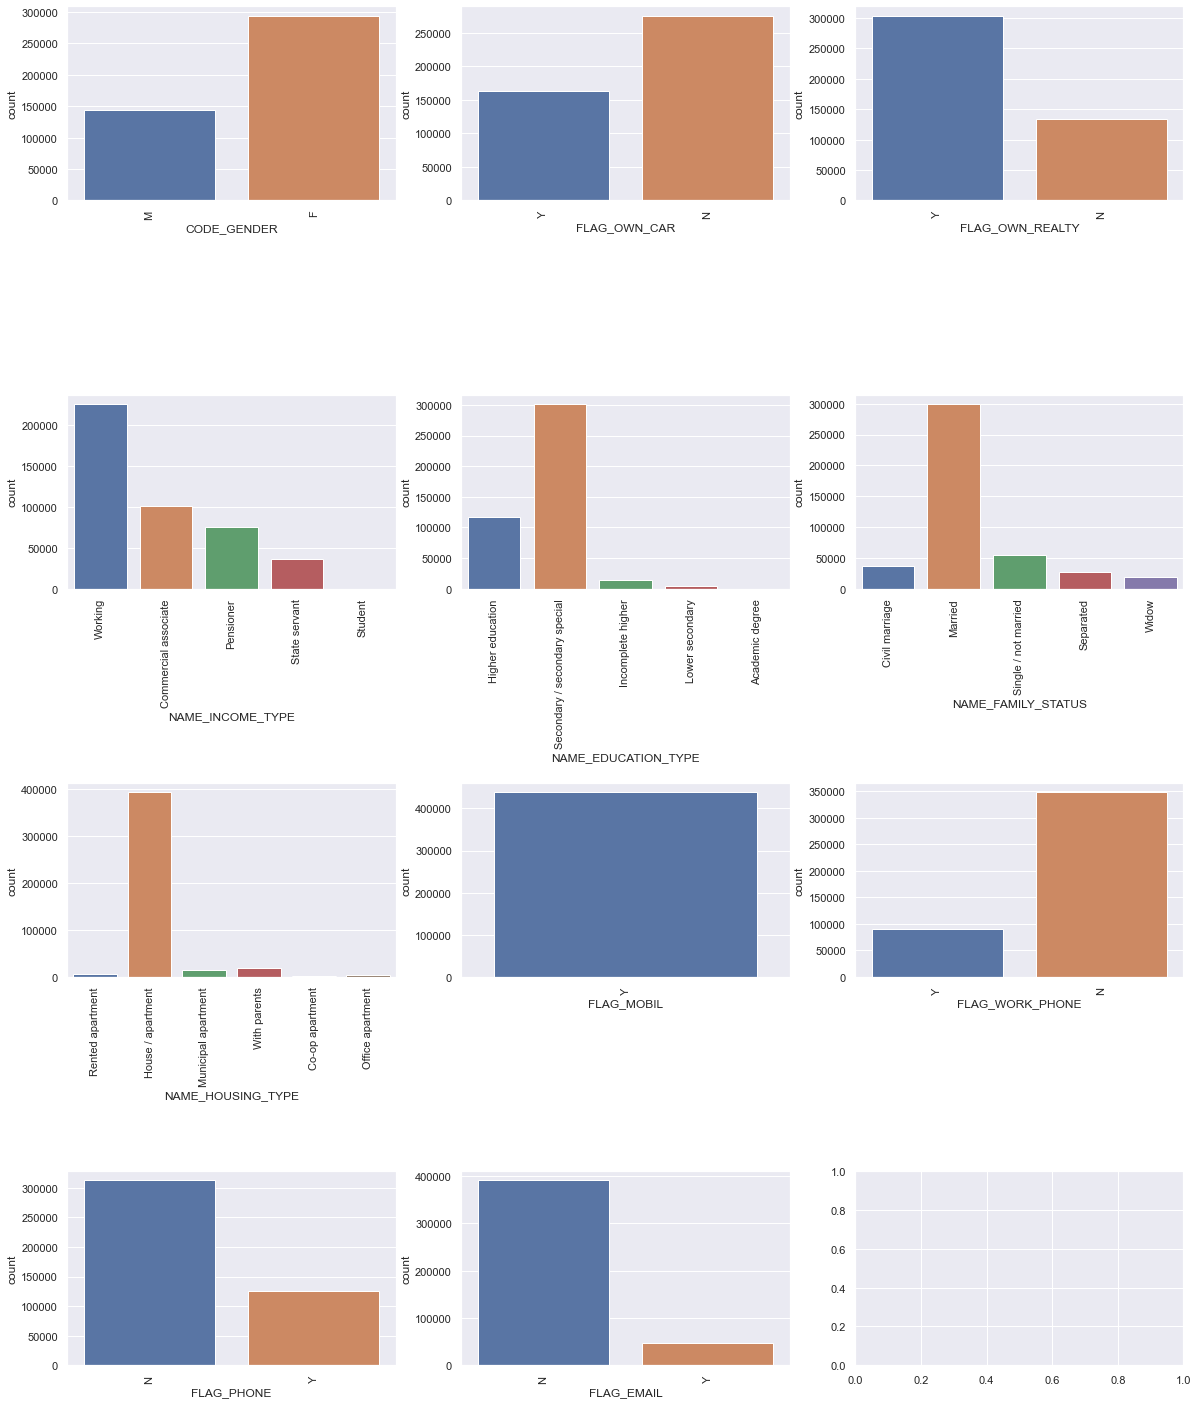

In [15]:
f, axes = plt.subplots(4, 3, figsize=(20, 25))
axes_flat = axes.flatten()
plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.2, hspace = 1.0)
for i, col in enumerate(categorial):
    sb.countplot(ax = axes_flat[i], data = appRecord, x = col)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation = 90)

#### Comments:
>We then plotted a summarized plot of the various Reponse variable we have into bar charts above.
>
>Notably, there are some values which may not be useful which we would be cleaning in the later portion on Data Cleaning

In [16]:
# displaying total count for categorical data
for i in appRecord.columns[(appRecord.dtypes == 'object').values].tolist():
    print(i, end = '\n')
    print(appRecord[i].value_counts())
    print('=======================================')

CODE_GENDER
F    294440
M    144117
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR
N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY
Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14

#### Comments:
>This breakdown gives a more accurate and detailed view as compared to the plot prior
>
>From this, we can also see that FLAG_MOBIL should be dropped as everyone in the dataset has a phone

### Exploring Numerical Variables

In [17]:
numeric = appRecord[['DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']]

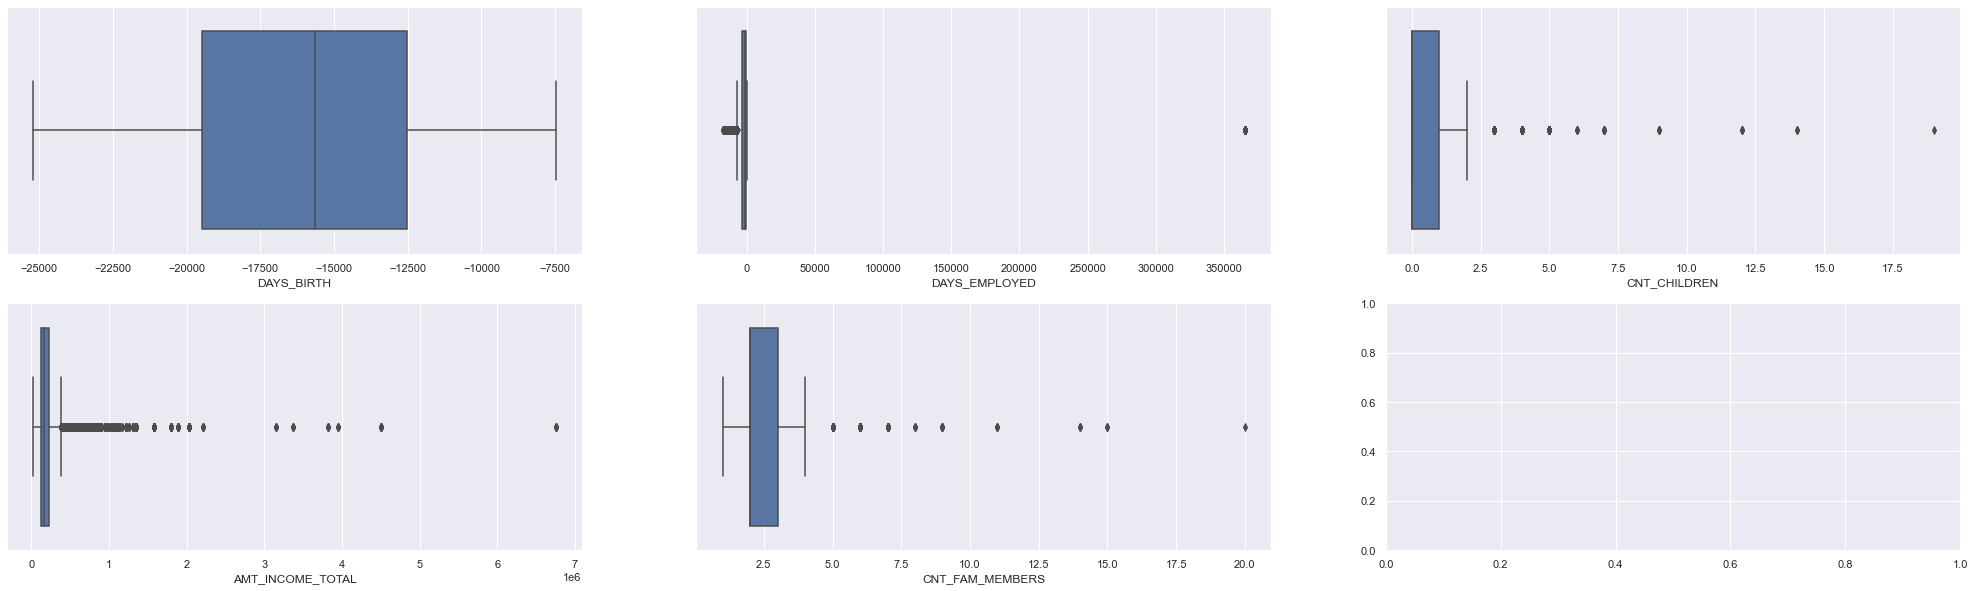

In [18]:
f, axes = plt.subplots(2, 3, figsize=(35, 10))
axes_flat = axes.flatten()

for i, col in enumerate(numeric):
    sb.boxplot(ax = axes_flat[i], data = appRecord, x = col)

In [19]:
for i in (appRecord.columns[(appRecord.dtypes == 'int').values].tolist())[1:]:
    print(i, end = '\n')
    print(appRecord[i].value_counts())
    print('=======================================')

CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64
DAYS_BIRTH
-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-8207       1
-8286       1
-12793      1
-24592      1
-8590       1
Name: DAYS_BIRTH, Length: 16379, dtype: int64
DAYS_EMPLOYED
 365243    75329
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64


In [20]:
numeric.describe()

DAYS_BIRTH  DAYS_EMPLOYED   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  438557.000000  438557.000000  438557.000000      4.385570e+05   
mean   -15997.904649   60563.675328       0.427390      1.875243e+05   
std      4185.030007  138767.799647       0.724882      1.100869e+05   
min    -25201.000000  -17531.000000       0.000000      2.610000e+04   
25%    -19483.000000   -3103.000000       0.000000      1.215000e+05   
50%    -15630.000000   -1467.000000       0.000000      1.607805e+05   
75%    -12514.000000    -371.000000       1.000000      2.250000e+05   
max     -7489.000000  365243.000000      19.000000      6.750000e+06   

       CNT_FAM_MEMBERS  
count    438557.000000  
mean          2.194465  
std           0.897207  
min           1.000000  
25%           2.000000  
50%           2.000000  
75%           3.000000  
max          20.000000

#### Comments:
> From the EDA, we will need to process the data for data cleaning in the following steps
>> - Remove FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL
>> - Remove rows that contains duplicate IDs
>> - Remove rows that contain duplicated information with different IDs in application_record
>> - Encode Categorial variables
>> - Convert DAYS_BIRTH variable to postive numbers (in years, rounded up)
>> - Convert DAYS_EMPLOYED to positive numbers (in years, rounded up) with 0 indicating unemployed

### Data Cleaning

#### Dropping Values

#### On file application_record.csv

In [21]:
# dropping columns that are not needed
appRecord.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],axis = 1, inplace = True)

#### Comments:
>As noted above, these are the variables which would not be helpful as a Predictor variable for the Response variable as whether if our client has a Mobile, Work phone, Phone or Email is not a good determinant to their ability and likelihood to repay their loans
>
>This is especially so for 'FLAG_MOBILE' since we have also noted earlier that all of our clients has mobile phones

#### Converting Days to Years

In [22]:
# Converting 'DAYS_BIRTH' values from days to years
appRecord['DAYS_BIRTH'] = round(appRecord['DAYS_BIRTH']/-365,0)
appRecord.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

#### Comments:
>We have also noted that days birth of our clients may not be very useful hence we have converted them to their age in terms of years instead and rounded them to the nearest whole number

In [23]:
# converting days employed to positive number 
appRecord['DAYS_EMPLOYED'] = appRecord['DAYS_EMPLOYED'].apply(lambda x: x*(-1))

#### Comments:
>We have noted that days employed is in negative value since it was counted backwards but we would change it to a positive value to make it more intuitive to read

#### Fixing Occupation Type

In [24]:
# checking unique values which are less than 0
appRecord[appRecord['DAYS_EMPLOYED'] < 0]['DAYS_EMPLOYED'].unique()

array([-365243])

#### Comments:
>From the dataset information in the website, all values of days employed that are positive are considerd unemployed.
>Since we had earlier reverse the DAYS_EMPLOYED nby multiplying it by '-1', all negative values in this column will now be considered unemployed.
>
>By ensuring that '-365242' bears no significance other than to demarcate that the given client is unemployed, we will change their days employed to '0' since it would be more intuitive.

In [25]:
# replacing the clients who are unemployed to 0
appRecord['DAYS_EMPLOYED'].replace(-365243,0,inplace = True)

#### Comments:
>Changing their days employed to '0' for those unemployed

In [26]:
#indicates null value under "OCCUPATION_TYPE" as "unemployed" 
#since data indicate that if "DAYS_EMPLOYED" > 0, then the respective person is unemployed
appRecord.loc[appRecord["DAYS_EMPLOYED"] == 0, "OCCUPATION_TYPE"] = "Unemployed"

#### Comments:
>We have highlighted earlier that there are some clients whose OCCUPATION_TYPE is noted to be null
>
>However, we have also noted that not all OCCUPATION_TYPE as null value mean that our client is unemployed as there are cases of it being null value but clients with 'DAYS_EMPLOYED' != 0, with banks likely knowning that the respective clients are still earning an income from the statement each month
>>Hence to ensure the veracity of the dataset, only when 'OCCUPATION_TYPE' is null and 'DAYS_EMPLOYED'==0 can we tell that our client is unemployed

In [27]:
# filling remaining null values in occupation_type to unknown
appRecord['OCCUPATION_TYPE'].fillna(value = "Unknown", inplace = True)

#### Comments:
>We have noted that the remaining of the 'OCCUPATION_TYPE' being null means that while our client is employed, we do not know of their occupation since it was not stated
>
>Hence for the remaining 'OCCUPATION_TYPE' being null, we have converted them all into 'OCCUPATION_TYPE' as 'Unknown'

In [28]:
# converting 'DAYS_EMPLOYED' values from days to years
appRecord['DAYS_EMPLOYED'] = round(appRecord['DAYS_EMPLOYED']/365.0)
appRecord.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

#### Comments:
>Similar to the days of birth of our clients converted to their age, we have also noted that days employed may not be very useful hence we have converted them to YEARS_EMPLOYED instead, and rounded them to the nearest whole number

#### Converting Data Types

In [29]:
# converting these columns values to int as we want the whole number value
appRecord['YEARS_EMPLOYED'] = appRecord['YEARS_EMPLOYED'].astype(int)
appRecord['AGE_YEARS'] = appRecord['AGE_YEARS'].astype(int)
appRecord['CNT_FAM_MEMBERS'] = appRecord['CNT_FAM_MEMBERS'].astype(int)
pd.options.display.float_format = "{:,.2f}".format

In [30]:
numeric_new = appRecord[['AGE_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS','CNT_CHILDREN']]
numeric_new

AGE_YEARS  YEARS_EMPLOYED  CNT_FAM_MEMBERS  CNT_CHILDREN
0              33              12                2             0
1              33              12                2             0
2              59               3                2             0
3              52               8                1             0
4              52               8                1             0
...           ...             ...              ...           ...
438552         62               0                1             0
438553         44               8                1             0
438554         22               1                1             0
438555         59               0                2             0
438556         52               3                2             0

[438557 rows x 4 columns]

#### Comments:
>We have also converted them to int type since we have rounded the variables of 'AGE_YEARS' and 'YEARS_EMPLOYED' to the nearest whole number
>
> Notably, dataset state 'CNT_CHILDREN' as a float but we know it also has to be an integer hence we have also converted it from a float to an int

#### Outliers

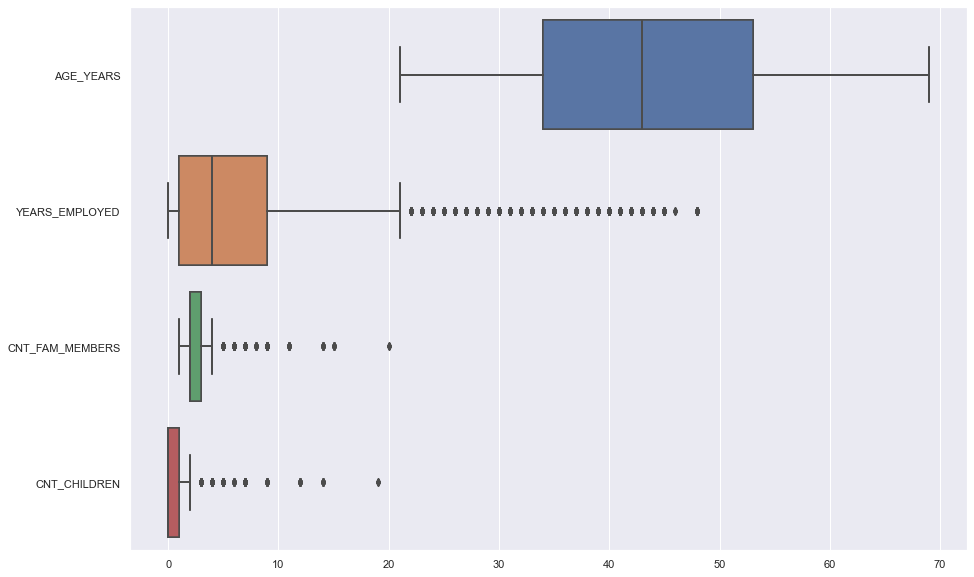

In [31]:
# create boxplot to detect outliers
plt.figure(figsize=(15, 10))

for i in numeric_new:
    sb.boxplot(data = numeric_new, orient = 'h')

In [32]:
# getting the number of outliers
Q1 = numeric_new.quantile(0.25)
Q3 = numeric_new.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_new < (Q1 - 1.5 * IQR)) | (numeric_new > (Q3 + 1.5 * IQR))).sum()
pd.DataFrame(outliers)

0
AGE_YEARS            0
YEARS_EMPLOYED   17141
CNT_FAM_MEMBERS   5690
CNT_CHILDREN      6075

In [33]:
# removing the outliers in the dataset
cols = ['AGE_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS','CNT_CHILDREN']
Q1 = appRecord[cols].quantile(0.25)
Q3 = appRecord[cols].quantile(0.75)
IQR = Q3 - Q1
appRecord = appRecord[~((appRecord[cols] < (Q1 - 1.5 * IQR)) | (appRecord[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
appRecord

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427,500.00               Working               Higher education   
1             427,500.00               Working               Higher education   
2             112,500.00               Working  Secondary / secondary special   
3             270,000.00  Commercial associate  Secondary / secondary special   
4             270,000.00  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552        135,000.00             Pensioner  Secondary / secondary special   
438553        103,500.00               Working  Secondary / secondary special   
438554         54,000.00  Commercial associate               Higher education   
438555         72,000.00             Pensioner  Secondary / secondary special   
438556        121,500.00               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
0             Civil marriage   Rented apartment         33              12   
1             Civil marriage   Rented apartment         33              12   
2                    Married  House / apartment         59               3   
3       Single / not married  House / apartment         52               8   
4       Single / not married  House / apartment         52               8   
...                      ...                ...        ...             ...   
438552             Separated  House / apartment         62               0   
438553  Single / not married  House / apartment         44               8   
438554  Single / not married       With parents         22               1   
438555               Married  House / apartment         59               0   
438556               Married  House / apartment         52               3   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0              Unknown                2  
1              Unknown                2  
2       Security staff                2  
3          Sales staff                1  
4          Sales staff                1  
...                ...              ...  
438552      Unemployed                1  
438553        Laborers                1  
438554     Sales staff                1  
438555      Unemployed                2  
438556     Sales staff                2  

[415442 rows x 14 columns]

In [34]:
# Based on the table above, not all of the outliers have been removed so we will run the cell again
cols = ['AGE_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS','CNT_CHILDREN']
Q1 = appRecord[cols].quantile(0.25)
Q3 = appRecord[cols].quantile(0.75)
IQR = Q3 - Q1
appRecord = appRecord[~((appRecord[cols] < (Q1 - 1.5 * IQR)) | (appRecord[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
appRecord

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             427,500.00               Working               Higher education   
1             427,500.00               Working               Higher education   
2             112,500.00               Working  Secondary / secondary special   
3             270,000.00  Commercial associate  Secondary / secondary special   
4             270,000.00  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552        135,000.00             Pensioner  Secondary / secondary special   
438553        103,500.00               Working  Secondary / secondary special   
438554         54,000.00  Commercial associate               Higher education   
438555         72,000.00             Pensioner  Secondary / secondary special   
438556        121,500.00               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
0             Civil marriage   Rented apartment         33              12   
1             Civil marriage   Rented apartment         33              12   
2                    Married  House / apartment         59               3   
3       Single / not married  House / apartment         52               8   
4       Single / not married  House / apartment         52               8   
...                      ...                ...        ...             ...   
438552             Separated  House / apartment         62               0   
438553  Single / not married  House / apartment         44               8   
438554  Single / not married       With parents         22               1   
438555               Married  House / apartment         59               0   
438556               Married  House / apartment         52               3   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0              Unknown                2  
1              Unknown                2  
2       Security staff                2  
3          Sales staff                1  
4          Sales staff                1  
...                ...              ...  
438552      Unemployed                1  
438553        Laborers                1  
438554     Sales staff                1  
438555      Unemployed                2  
438556     Sales staff                2  

[406891 rows x 14 columns]

<hr style="border:2px solid gray"> </hr>

## Exploratory Analysis

#### On file credit_record.csv

|STATUS|DESCRIPTION|
|:--|:--|
|0|1-29 days past due|
|1|30-59 days past due|
|2|60-89 days past due|
|3|90-119 days past due|
|4|120-149 days past due|
|5|Overdue or bad debts, write-offs for more than 150 days|
|C|Paid off that month|
|X|No loan for that month|

In [35]:
creditRecord

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [36]:
(creditRecord['STATUS'].value_counts()).sort_values(ascending = False)

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

### Data Cleaning 2

#### Converting Categorical Variable

In [37]:
# categorising 'STATUS' column to binary classification - 0 : Low Risk Client and 1 : High Risk Client
creditRecord['STATUS'].replace(['C','X'],0, inplace = True)
creditRecord['STATUS'].replace(['2','3','4','5'],1, inplace = True)
creditRecord

ID  MONTHS_BALANCE STATUS
0        5001711               0      0
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      0
...          ...             ...    ...
1048570  5150487             -25      0
1048571  5150487             -26      0
1048572  5150487             -27      0
1048573  5150487             -28      0
1048574  5150487             -29      0

[1048575 rows x 3 columns]

In [38]:
# checking dtypes of dataset
creditRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [39]:
# changing "STATUS" dtype to int 
creditRecord['STATUS'] = creditRecord['STATUS'].astype(int)

In [40]:
# checking whether dtype has been changed
creditRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [41]:
# based on the description -ve values means prev months, so we decided to change to positive for data manipulation
creditRecord['MONTHS_BALANCE'] = creditRecord['MONTHS_BALANCE'].apply(lambda x: x*(-1))

In [42]:
# analysing the percentage of low risk and high risk clients without manipulation
creditRecord['STATUS'].value_counts(normalize = True)*100

0   98.65
1    1.35
Name: STATUS, dtype: float64

In [43]:
creditRecord['MONTHS_BALANCE'].value_counts().sort_values(ascending = True)

60      415
59      820
58     1255
57     1649
56     2109
      ...  
4     33365
3     33854
0     33856
2     34209
1     34436
Name: MONTHS_BALANCE, Length: 61, dtype: int64

#### Using Aggregation to size down to a binary form of dataset

In [44]:
# using aggregation to calculate the average "goodnesss" of clients to determine whether a client is low or high risk
credit_df = creditRecord.groupby('ID').agg(max).reset_index()

In [45]:
credit_df = credit_df.rename(columns={'STATUS': 'GOOD_OR_BAD_CLIENT'})

In [46]:
credit_df.drop(['MONTHS_BALANCE'], axis = 1, inplace = True)
credit_df['GOOD_OR_BAD_CLIENT'].value_counts(normalize = True)*100 # analysing the percentage after manipulation

0   88.37
1   11.63
Name: GOOD_OR_BAD_CLIENT, dtype: float64

### Comments:
> Noted that data is very imbalanced and biased towards "Good" clients, have to balance data during pre-processing data for machine learning models

In [47]:
credit_df

ID  GOOD_OR_BAD_CLIENT
0      5001711                   0
1      5001712                   0
2      5001713                   0
3      5001714                   0
4      5001715                   0
...        ...                 ...
45980  5150482                   0
45981  5150483                   0
45982  5150484                   0
45983  5150485                   0
45984  5150487                   0

[45985 rows x 2 columns]

<hr style="border:2px solid gray"> </hr>

## Merging credit_record and application_record


Next, we have merged the datas in the Pandas Data Frame from 'application_record' and 'credit_record' to a new Pandas Data Frame under 'final_df'.  
This gives us a more holistic view on the individual customer ID by concatenting their personal details (predictor) from 'applicationRecord', to their credit rating (response) from 'creditRecord'. 

In [48]:
final_df = pd.DataFrame(pd.merge(appRecord,credit_df, on='ID',how='inner'))
final_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804           M            Y               Y             0   
1      5008805           M            Y               Y             0   
2      5008806           M            Y               Y             0   
3      5008808           F            N               Y             0   
4      5008809           F            N               Y             0   
...        ...         ...          ...             ...           ...   
33814  5149828           M            Y               Y             0   
33815  5149834           F            N               Y             0   
33816  5149838           F            N               Y             0   
33817  5150049           F            N               Y             0   
33818  5150337           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0            427,500.00               Working               Higher education   
1            427,500.00               Working               Higher education   
2            112,500.00               Working  Secondary / secondary special   
3            270,000.00  Commercial associate  Secondary / secondary special   
4            270,000.00  Commercial associate  Secondary / secondary special   
...                 ...                   ...                            ...   
33814        315,000.00               Working  Secondary / secondary special   
33815        157,500.00  Commercial associate               Higher education   
33816        157,500.00             Pensioner               Higher education   
33817        283,500.00               Working  Secondary / secondary special   
33818        112,500.00               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
0            Civil marriage   Rented apartment         33              12   
1            Civil marriage   Rented apartment         33              12   
2                   Married  House / apartment         59               3   
3      Single / not married  House / apartment         52               8   
4      Single / not married  House / apartment         52               8   
...                     ...                ...        ...             ...   
33814               Married  House / apartment         48               7   
33815               Married  House / apartment         34               4   
33816               Married  House / apartment         34               4   
33817               Married  House / apartment         49               2   
33818  Single / not married   Rented apartment         25               3   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  GOOD_OR_BAD_CLIENT  
0             Unknown                2                   1  
1             Unknown                2                   1  
2      Security staff                2                   0  
3         Sales staff                1                   0  
4         Sales staff                1                   0  
...               ...              ...                 ...  
33814        Managers                2                   1  
33815  Medicine staff                2                   1  
33816  Medicine staff                2                   1  
33817     Sales staff                2                   1  
33818        Laborers                1                   1  

[33819 rows x 15 columns]

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819 entries, 0 to 33818
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   33819 non-null  int64  
 1   CODE_GENDER          33819 non-null  object 
 2   FLAG_OWN_CAR         33819 non-null  object 
 3   FLAG_OWN_REALTY      33819 non-null  object 
 4   CNT_CHILDREN         33819 non-null  int64  
 5   AMT_INCOME_TOTAL     33819 non-null  float64
 6   NAME_INCOME_TYPE     33819 non-null  object 
 7   NAME_EDUCATION_TYPE  33819 non-null  object 
 8   NAME_FAMILY_STATUS   33819 non-null  object 
 9   NAME_HOUSING_TYPE    33819 non-null  object 
 10  AGE_YEARS            33819 non-null  int64  
 11  YEARS_EMPLOYED       33819 non-null  int64  
 12  OCCUPATION_TYPE      33819 non-null  object 
 13  CNT_FAM_MEMBERS      33819 non-null  int64  
 14  GOOD_OR_BAD_CLIENT   33819 non-null  int64  
dtypes: float64(1), int64(6), object(8)
m

In [50]:
print("Number of rows containing same ID in merged data-set: ",sum(final_df.duplicated(subset='ID')))
print("Numer of rows containing duplicated information in merged data-set: ",sum(final_df.drop(columns='ID').duplicated()) )

Number of rows containing same ID in merged data-set:  0
Numer of rows containing duplicated information in merged data-set:  23479


In [51]:
final_df.drop_duplicates(subset = list(set(final_df.columns) - {'ID'}), inplace = True)

In [52]:
final_df.isna().sum() # checking for any null values

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
GOOD_OR_BAD_CLIENT     0
dtype: int64

In [53]:
final_df['GOOD_OR_BAD_CLIENT'].value_counts(normalize=True)*100

0   78.61
1   21.39
Name: GOOD_OR_BAD_CLIENT, dtype: float64

In [54]:
# checking whether duplicates have been dropped
final_df

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804           M            Y               Y             0   
2      5008806           M            Y               Y             0   
3      5008808           F            N               Y             0   
7      5008812           F            N               Y             0   
10     5008815           M            Y               Y             0   
...        ...         ...          ...             ...           ...   
33808  5149055           F            N               Y             0   
33813  5149729           M            Y               Y             0   
33814  5149828           M            Y               Y             0   
33816  5149838           F            N               Y             0   
33818  5150337           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0            427,500.00               Working               Higher education   
2            112,500.00               Working  Secondary / secondary special   
3            270,000.00  Commercial associate  Secondary / secondary special   
7            283,500.00             Pensioner               Higher education   
10           270,000.00               Working               Higher education   
...                 ...                   ...                            ...   
33808        112,500.00  Commercial associate  Secondary / secondary special   
33813         90,000.00               Working  Secondary / secondary special   
33814        315,000.00               Working  Secondary / secondary special   
33816        157,500.00             Pensioner               Higher education   
33818        112,500.00               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
0            Civil marriage   Rented apartment         33              12   
2                   Married  House / apartment         59               3   
3      Single / not married  House / apartment         52               8   
7                 Separated  House / apartment         62               0   
10                  Married  House / apartment         46               2   
...                     ...                ...        ...             ...   
33808               Married  House / apartment         43               7   
33813               Married  House / apartment         52               5   
33814               Married  House / apartment         48               7   
33816               Married  House / apartment         34               4   
33818  Single / not married   Rented apartment         25               3   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  GOOD_OR_BAD_CLIENT  
0             Unknown                2                   1  
2      Security staff                2                   0  
3         Sales staff                1                   0  
7          Unemployed                1                   0  
10        Accountants                2                   0  
...               ...              ...                 ...  
33808         Unknown                2                   1  
33813         Unknown                2                   1  
33814        Managers                2                   1  
33816  Medicine staff                2                   1  
33818        Laborers                1                   1  

[10340 rows x 15 columns]

### Comments:
> After dropping duplicates, data-set further reduced from over 33819 rows to 10340 rows

<hr style="border:2px solid gray"> </hr>

## Data Visualisation

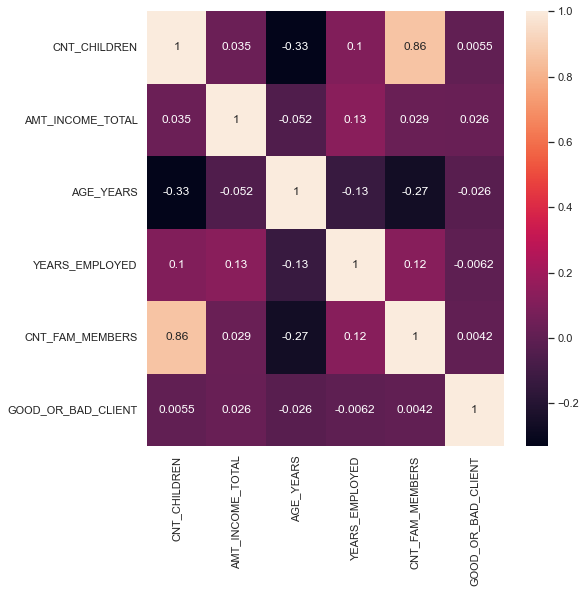

In [55]:
# The graph shows that there are no NUMERIC features that are closely related with 'GOOD_OR_BAD_CLIENT'
plt.figure(figsize = (8,8))
target = final_df.copy().drop(['ID'],axis=1)
sb.heatmap(target.corr(), annot=True)
plt.show()

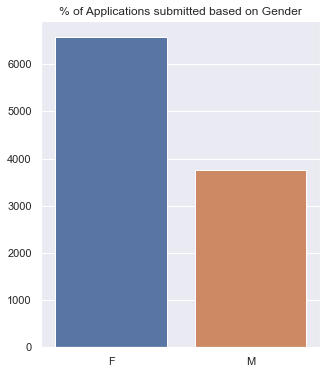

In [56]:
# Barplot shows that majority of applications are submitted by Females
plt.figure(figsize = (5,6))
sb.barplot(x = final_df['CODE_GENDER'].value_counts().index, y = final_df['CODE_GENDER'].value_counts().values)
plt.title("% of Applications submitted based on Gender")
plt.show()

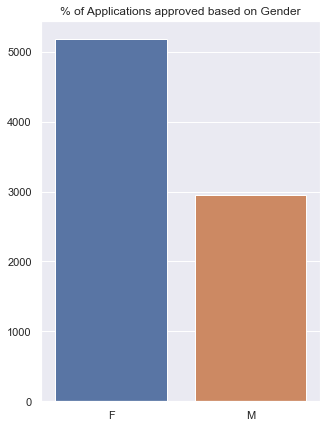

In [57]:
# Barplot shows that majority of applications that are approved are for Females
plt.figure(figsize = (5,7))
target = final_df[final_df['GOOD_OR_BAD_CLIENT'] == 0]['CODE_GENDER'].value_counts()
sb.barplot(x = target.index, y = target.values)
plt.title("% of Applications approved based on Gender")
plt.show()

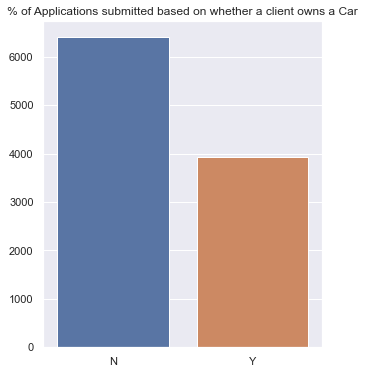

In [58]:
# Barplot shows that majority of applicants do not own a car
plt.figure(figsize = (5,6))
sb.barplot(x = final_df['FLAG_OWN_CAR'].value_counts().index, y = final_df['FLAG_OWN_CAR'].value_counts().values)
plt.title('% of Applications submitted based on whether a client owns a Car')
plt.show()

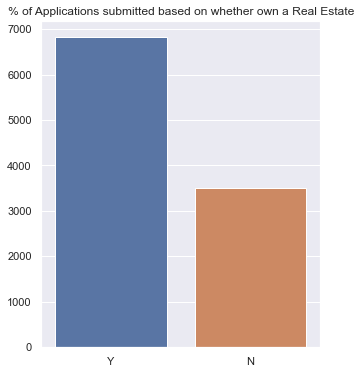

In [59]:
# Barplot shows that majority of applicants own a Real Estate
plt.figure(figsize = (5,6))
sb.barplot(x = final_df['FLAG_OWN_REALTY'].value_counts().index, y = final_df['FLAG_OWN_REALTY'].value_counts().values)
plt.title('% of Applications submitted based on whether own a Real Estate')
plt.show()

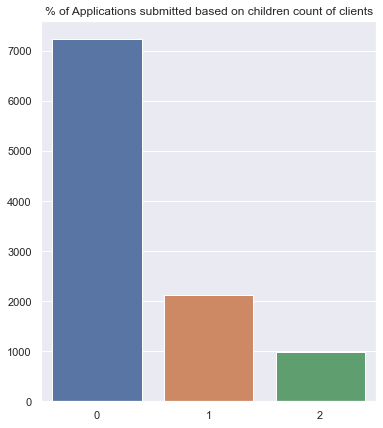

In [60]:
# Barplot shows that majority of applicants do not have any children
plt.figure(figsize = (6,7))
sb.barplot(x = final_df['CNT_CHILDREN'].value_counts().index, y = final_df['CNT_CHILDREN'].value_counts().values)
plt.title('% of Applications submitted based on children count of clients')
plt.show()

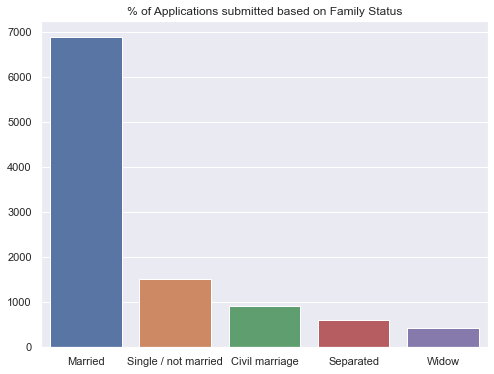

In [61]:
# Barplot shows that majority of applicants are "Married"
plt.figure(figsize = (8,6))
sb.barplot(x = final_df['NAME_FAMILY_STATUS'].value_counts().index, y = final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

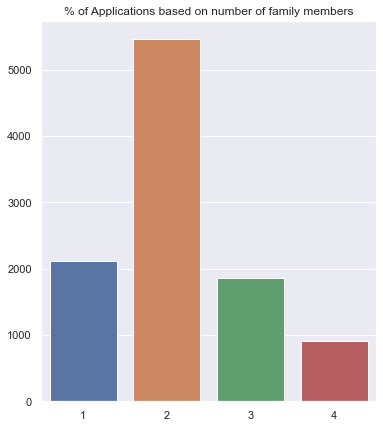

In [62]:
# Barplot shows that majority of applicants have at least 2 or more family members
plt.figure(figsize = (6,7))
sb.barplot(x = final_df['CNT_FAM_MEMBERS'].value_counts().index, y = final_df['CNT_FAM_MEMBERS'].value_counts().values)
plt.title('% of Applications based on number of family members')
plt.show()

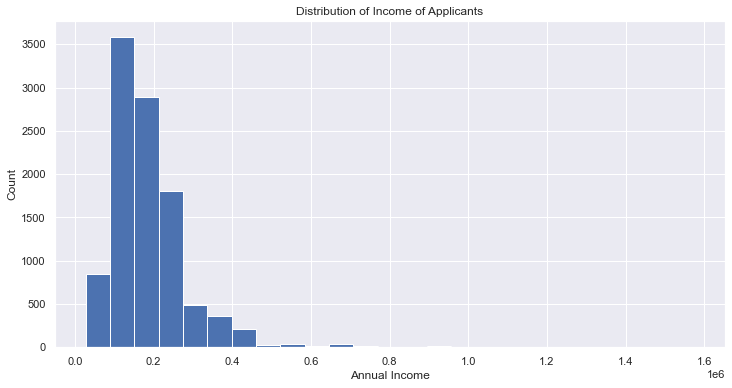

In [63]:
# Histogram shows that majority of applicants have income between 100k and 300k
plt.figure(figsize = (12,6))
plt.hist(final_df['AMT_INCOME_TOTAL'], bins = 25)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Income of Applicants')
plt.show()

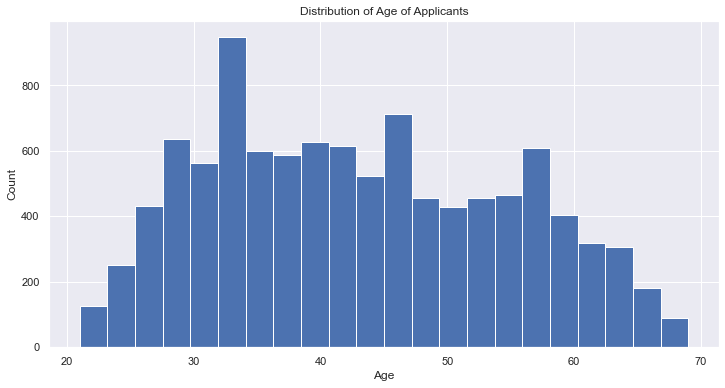

In [64]:
# Histogram shows that, majority of applicants are 30 to 58 years old
plt.figure(figsize = (12,6))
plt.hist(final_df['AGE_YEARS'], bins=22)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age of Applicants')
plt.show()

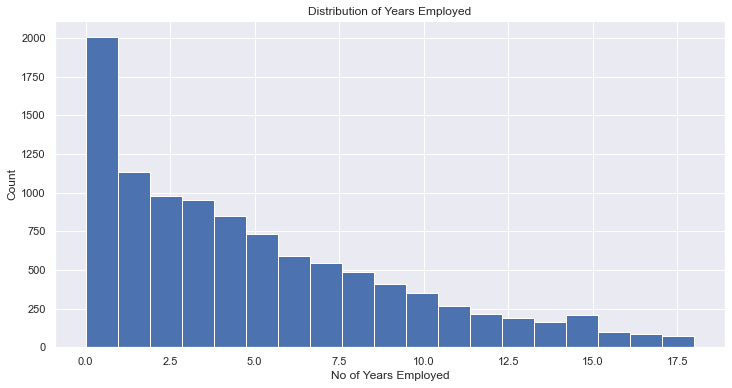

In [65]:
# Histogram shows that majority of applicants are "Employed" for 0 to 7 years
plt.figure(figsize = (12,6))
plt.hist(final_df['YEARS_EMPLOYED'], bins=19)
plt.xlabel('No of Years Employed')
plt.ylabel('Count')
plt.title('Distribution of Years Employed')
plt.show()

<hr style="border:2px solid gray"> </hr>

## Conducting Train-test split to estimate the better predictors

In [66]:
# random seed = 42
# Split the Dataset into Train and Test
train, test = train_test_split(final_df, test_size = 0.20, random_state=42)

#### Comments:
> Holding train test split so that we can take unbiased decisions when analysing the different predictors

### Client's Gender
We will now check our Client's Gender as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [67]:
pd.DataFrame(train.CODE_GENDER.value_counts())

CODE_GENDER
F         5251
M         3021

In [68]:
#breakdown into their respective gender
byGender = train.groupby("CODE_GENDER").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byGender

CODE_GENDER  GOOD_OR_BAD_CLIENT
F            0                    0.79
             1                    0.21
M            0                    0.78
             1                    0.22
Name: GOOD_OR_BAD_CLIENT, dtype: float64

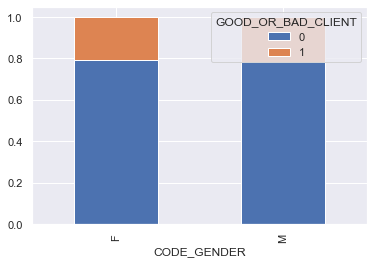

In [69]:
byGender.unstack().plot(kind='bar', stacked= True)
showfliers = False

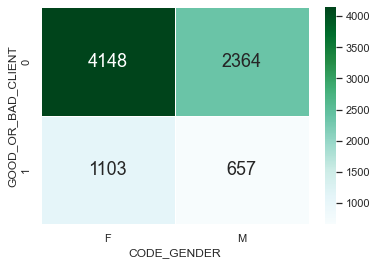

In [70]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(train.groupby(['GOOD_OR_BAD_CLIENT', 'CODE_GENDER']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
showfliers = False

#### Comments
> From the above analysis, we could see that the majority of applications approved based on gender are for Females 
>> However, Gender might not be a good indicator for determinating whether a client is of high risk / low risk client

---

### Client's possession of Cars
 We will now check our Client's possession of cars (i.e. if they own a car) as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [71]:
pd.DataFrame(train.FLAG_OWN_CAR.value_counts())

FLAG_OWN_CAR
N          5094
Y          3178

In [72]:
#breakdown into their groupings on if they have cars
byCar = train.groupby("FLAG_OWN_CAR").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byCar

FLAG_OWN_CAR  GOOD_OR_BAD_CLIENT
N             0                    0.79
              1                    0.21
Y             0                    0.79
              1                    0.21
Name: GOOD_OR_BAD_CLIENT, dtype: float64

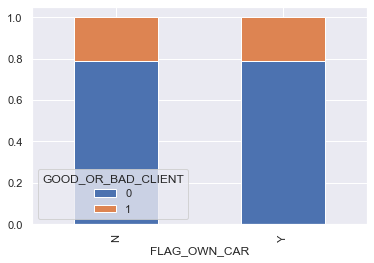

In [73]:
byCar.unstack().plot(kind='bar', stacked= True)
showfliers = False

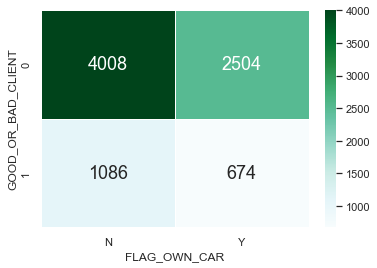

In [74]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(train.groupby(['GOOD_OR_BAD_CLIENT', 'FLAG_OWN_CAR']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
showfliers = False

In [75]:
#By introducing a third variable to check if it affects the relationship between the first two variables
#Taking into accound Simpson's Paradox
byCar2 = train.groupby(["FLAG_OWN_REALTY", "FLAG_OWN_CAR"]).GOOD_OR_BAD_CLIENT.value_counts(normalize=True)
byCar2

FLAG_OWN_REALTY  FLAG_OWN_CAR  GOOD_OR_BAD_CLIENT
N                N             0                    0.78
                               1                    0.22
                 Y             0                    0.77
                               1                    0.23
Y                N             0                    0.79
                               1                    0.21
                 Y             0                    0.80
                               1                    0.20
Name: GOOD_OR_BAD_CLIENT, dtype: float64

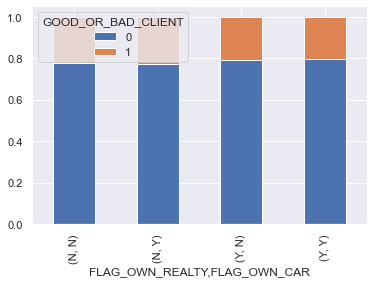

In [76]:
#Plotting above findings onto a graph to derive
byCar2.unstack().plot(kind='bar', stacked=True)
showfliers = False

#### Comments
> Based on the above analysis, we can see most clients do not own a car 
>> This could be used as a further insight as to whether having a car affects clients' ability to pay back their loans

---

### Client's posssession of Property
We will now check our Client's possession of property (i.e. if they own a property) as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [77]:
pd.DataFrame(train.FLAG_OWN_REALTY.value_counts())

FLAG_OWN_REALTY
Y             5421
N             2851

In [78]:
#breakdown into their respective groupings on if they have properties
byPrty = train.groupby("FLAG_OWN_REALTY").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byPrty

FLAG_OWN_REALTY  GOOD_OR_BAD_CLIENT
N                0                    0.77
                 1                    0.23
Y                0                    0.79
                 1                    0.21
Name: GOOD_OR_BAD_CLIENT, dtype: float64

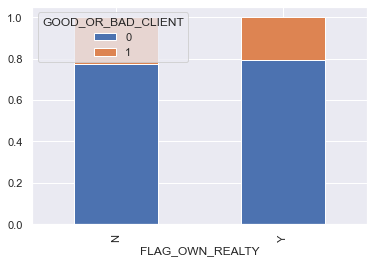

In [79]:
byPrty.unstack().plot(kind='bar', stacked= True)
showfliers = False

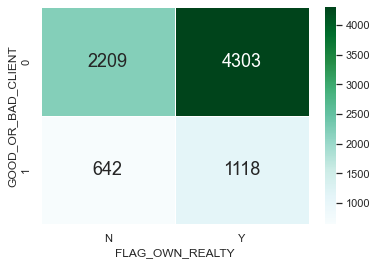

In [80]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(train.groupby(['GOOD_OR_BAD_CLIENT', 'FLAG_OWN_REALTY']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
showfliers = False

#### Comments
> Based on the above analysis, we can see that most applicants 

---

### Client's number of Children
We will use Client's number of children (i.e. number of children our client has) as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [81]:
pd.DataFrame(train.CNT_CHILDREN.value_counts())

CNT_CHILDREN
0          5793
1          1714
2           765

In [82]:
#breakdown into the number of children our clients has
byNoChild = train.groupby("CNT_CHILDREN").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byNoChild

CNT_CHILDREN  GOOD_OR_BAD_CLIENT
0             0                    0.79
              1                    0.21
1             0                    0.79
              1                    0.21
2             0                    0.78
              1                    0.22
Name: GOOD_OR_BAD_CLIENT, dtype: float64

#### Comments
> Based on the above analysis, we can see that majority of our clients do not have any chidren

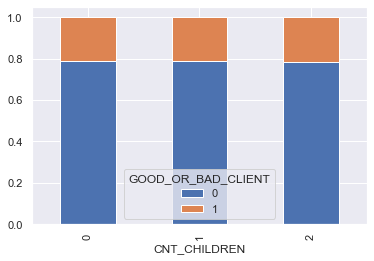

In [83]:
byNoChild.unstack().plot(kind='bar', stacked= True)
showfliers = False

#### We would be introducing a third variable, 'NAME_FAMILY_STATUS' due to the variables being extremely interconnected

>We have also noted that we should not focus solely on the number of Child they have and should also account for their family status since the number of child, the number of family members and family status (married, single, separated etc.) as variables are extremely interconnect

In [84]:
pd.DataFrame(train.NAME_FAMILY_STATUS.value_counts())

NAME_FAMILY_STATUS
Married                             5521
Single / not married                1205
Civil marriage                       744
Separated                            471
Widow                                331

In [85]:
#Taking into account interconnectiveness of data
byNoChild2 = train.groupby(["NAME_FAMILY_STATUS", "CNT_CHILDREN"]).GOOD_OR_BAD_CLIENT.value_counts(normalize=True)
byNoChild2

NAME_FAMILY_STATUS    CNT_CHILDREN  GOOD_OR_BAD_CLIENT
Civil marriage        0             0                    0.78
                                    1                    0.22
                      1             0                    0.79
                                    1                    0.21
                      2             0                    0.86
                                    1                    0.14
Married               0             0                    0.79
                                    1                    0.21
                      1             0                    0.79
                                    1                    0.21
                      2             0                    0.78
                                    1                    0.22
Separated             0             0                    0.80
                                    1                    0.20
                      1             0                    0.83
               

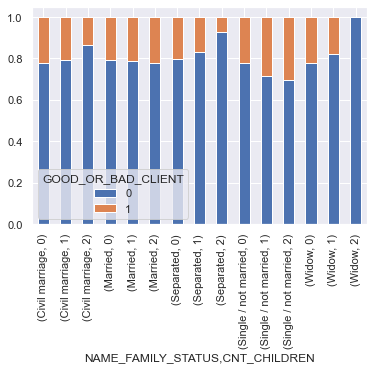

In [86]:
#Plotting above findings onto a graph to derive
byNoChild2.unstack().plot(kind='bar', stacked=True)
showfliers = False

---

### Client's number of Family Member
We will our Client's number of family member (i.e. number of family members our client has) as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [87]:
pd.DataFrame(train.CNT_FAM_MEMBERS.value_counts().sort_index())

CNT_FAM_MEMBERS
1             1677
2             4389
3             1493
4              713

In [88]:
#breakdown into the number of family members our clients has
byNoFam = train.groupby("CNT_FAM_MEMBERS").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byNoFam

CNT_FAM_MEMBERS  GOOD_OR_BAD_CLIENT
1                0                    0.78
                 1                    0.22
2                0                    0.79
                 1                    0.21
3                0                    0.79
                 1                    0.21
4                0                    0.78
                 1                    0.22
Name: GOOD_OR_BAD_CLIENT, dtype: float64

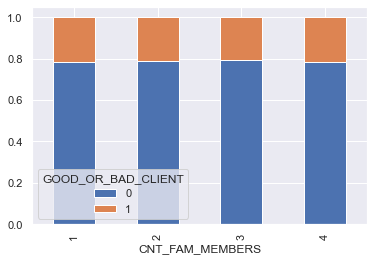

In [89]:
byNoFam.unstack().plot(kind='bar', stacked= True)
showfliers = False

#### We would be introducing a third variable, 'NAME_FAMILY_STATUS' due to the variables being extremely interconnected

>We have also noted that we should not focus solely on the number of Child they have and should also account for their family status since the number of child, the number of family members and family status (married, single, separated etc.) as variables are extremely interconnect

In [90]:
pd.DataFrame(train.NAME_FAMILY_STATUS.value_counts())

NAME_FAMILY_STATUS
Married                             5521
Single / not married                1205
Civil marriage                       744
Separated                            471
Widow                                331

In [91]:
#Taking into account interconnectiveness of data
byNoFam2 = train.groupby(["NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS"]).GOOD_OR_BAD_CLIENT.value_counts(normalize=True)
byNoFam2

NAME_FAMILY_STATUS    CNT_FAM_MEMBERS  GOOD_OR_BAD_CLIENT
Civil marriage        1                1                    1.00
                      2                0                    0.78
                                       1                    0.22
                      3                0                    0.80
                                       1                    0.20
                      4                0                    0.86
                                       1                    0.14
Married               1                1                    1.00
                      2                0                    0.79
                                       1                    0.21
                      3                0                    0.79
                                       1                    0.21
                      4                0                    0.78
                                       1                    0.22
Separated             1         

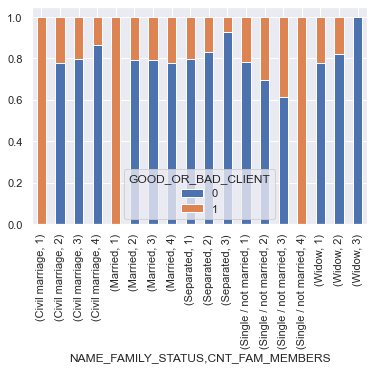

In [92]:
#Plotting above findings onto a graph to derive
byNoFam2.unstack().plot(kind='bar', stacked=True)
showfliers = False

---

### Client's Age and Years Employed
#### We will now check the Client's Age ('AGE_YEARS')and Years Employed ('YEARS_EMPLOYED') as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.
> Part 1: we will consider the Client's Age (AGE_YEARS)
>
> Part 2: we will consider the Client's years employed ('YEARS_EMPLOYED')

### Client's Age

<AxesSubplot:xlabel='AGE_YEARS', ylabel='GOOD_OR_BAD_CLIENT'>

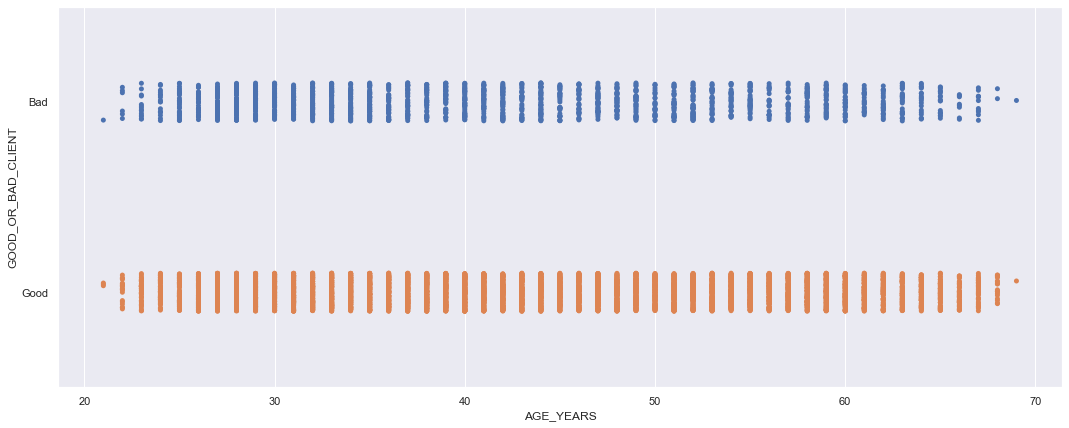

In [93]:
f = plt.figure(figsize=(18, 7))
temp_df = train.copy()
temp_df['GOOD_OR_BAD_CLIENT'].replace([0],'Good',inplace = True)
temp_df['GOOD_OR_BAD_CLIENT'].replace([1],'Bad',inplace = True)
sb.stripplot(x = 'AGE_YEARS', y = 'GOOD_OR_BAD_CLIENT', data = temp_df)

In [94]:
pd.DataFrame(temp_df['AGE_YEARS'].describe())

AGE_YEARS
count   8,272.00
mean       42.99
std        11.60
min        21.00
25%        33.00
50%        42.00
75%        52.00
max        69.00

### Client's Years Employed

<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='GOOD_OR_BAD_CLIENT'>

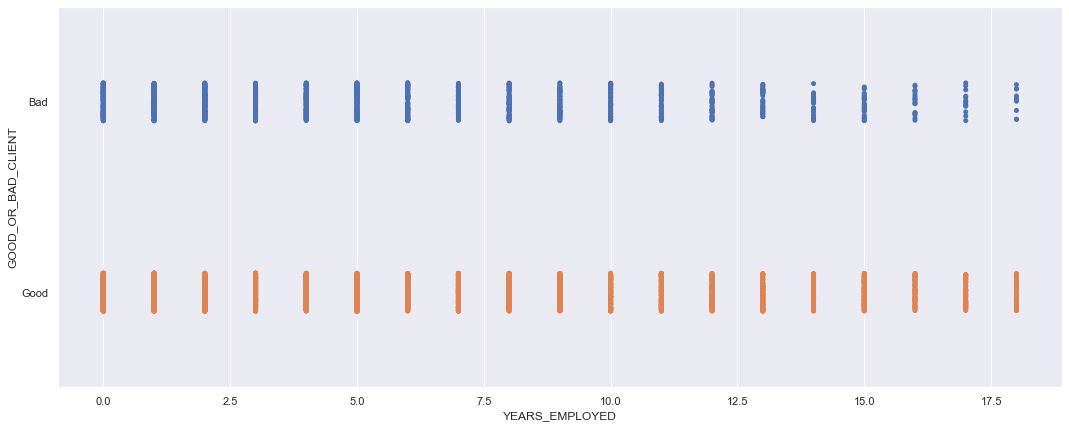

In [95]:
f = plt.figure(figsize=(18, 7))
temp_df = train.copy()
temp_df['GOOD_OR_BAD_CLIENT'].replace([0],'Good',inplace = True)
temp_df['GOOD_OR_BAD_CLIENT'].replace([1],'Bad',inplace = True)
sb.stripplot(x = 'YEARS_EMPLOYED', y = 'GOOD_OR_BAD_CLIENT', data = temp_df)

In [96]:
pd.DataFrame(temp_df['YEARS_EMPLOYED'].describe())

YEARS_EMPLOYED
count        8,272.00
mean             4.80
std              4.48
min              0.00
25%              1.00
50%              4.00
75%              7.00
max             18.00

#### Comments:
> We have noted that our Client's Age (AGE_YEARS) and their years of employment (YEARS_EMPLOYED) has a very sparsed data-set. 
>
>>However, we would like to highlight that the two aforementioned variable is not completely useless as it can aid our data exploration and visualization as seen at the late stages below

---

### Employment Status
We will now check our Client's possession of cars (i.e. if they own a car) as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

>We will create a new column that generalises if client is Employed or Unemployed, which is a larger subset to their occupation type
>
>Next, we will formalize data to draw key relationship between the two categorical data


In [97]:
#First, we create a temporary dataframe, temp_df, which is a duplication to our main dataframe
#Since we would be adding new columns as the parent type to existing columns for our analysis 
#but we do not want it to affect the original dataframe
temp_df = final_df.copy()
temp_df["EMPLOYMENT_STATUS"] = temp_df["OCCUPATION_TYPE"]
temp_df.loc[temp_df["OCCUPATION_TYPE"]!="Unemployed","EMPLOYMENT_STATUS"] = "Employed"
temp_df["EMPLOYMENT_STATUS"].value_counts()
temp_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0   5008804           M            Y               Y             0   
2   5008806           M            Y               Y             0   
3   5008808           F            N               Y             0   
7   5008812           F            N               Y             0   
10  5008815           M            Y               Y             0   

    AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         427,500.00               Working               Higher education   
2         112,500.00               Working  Secondary / secondary special   
3         270,000.00  Commercial associate  Secondary / secondary special   
7         283,500.00             Pensioner               Higher education   
10        270,000.00               Working               Higher education   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
0         Civil marriage   Rented apartment         33              12   
2                Married  House / apartment         59               3   
3   Single / not married  House / apartment         52               8   
7              Separated  House / apartment         62               0   
10               Married  House / apartment         46               2   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  GOOD_OR_BAD_CLIENT EMPLOYMENT_STATUS  
0          Unknown                2                   1          Employed  
2   Security staff                2                   0          Employed  
3      Sales staff                1                   0          Employed  
7       Unemployed                1                   0        Unemployed  
10     Accountants                2                   0          Employed

---
#### However, we would like to highlight that Employment status may also be dependent on 'AGE_YEARS' and 'YEARS_EMPLOYED'
Justification:
>'AGE_YEARS' = the age of our clients
>>Especially so in countries like Japan where their Employment Status and salary tied to the person's age
>

>'YEARS_EMPLOYED' = the number of years employed
>>Especially so in many companies where their Employment Status and salary tied to the person's number of years employed


#### Thus, we would be taking into account these in the below mentioned steps:
>'AGE_YEARS' bin
>>Classifying it to the respective bins for a better analysis
>>Reasonsing: Age of clients too discrete to draw meaningful conclusion as a variable

>'YEARS_EMPLOYED' bin
>>Similarly, to classify it to the respective bins for a better analysis
>>Reasoning: While years employed of clients does not has a variance as high as that of 'AGE_YEARS', data is still too discrete to draw meaningful conclusion as a variable
>>In addition: For this, we will only consider years employed from 1 years onwards due to years employed = 0 may not be a very reliable factor as a third factor in determining the client's number of years employed to the relationship between if they are "a good or a bad client" to their employement status
---

In [98]:
#check on AGE_YEARS
pd.DataFrame(train.AGE_YEARS.value_counts().sort_index()).head()

AGE_YEARS
21          4
22         25
23         65
24         80
25        119

In [99]:
#classify it into the respective bins for a better analysis
#Reasoning: Age of clients too discrete to draw meaningful conclusion as a variable
temp_df["ageGroup"] = pd.cut(temp_df.AGE_YEARS, [20,25,30,35,40,45,50,55,60,65,70],labels=['21-25', '26-30','31-35','36-40','41-45', '46-50', '51-55', '56-60', '61-65', '66-70'])
temp_df["ageGroup"].head()

0     31-35
2     56-60
3     51-55
7     61-65
10    46-50
Name: ageGroup, dtype: category
Categories (10, object): ['21-25' < '26-30' < '31-35' < '36-40' ... '51-55' < '56-60' < '61-65' < '66-70']

In [100]:
#check on YEARS_EMPLOYED
pd.DataFrame(train.YEARS_EMPLOYED.value_counts().sort_index())

YEARS_EMPLOYED
0             1575
1              898
2              779
3              775
4              674
5              589
6              480
7              448
8              389
9              334
10             279
11             221
12             172
13             156
14             129
15             154
16              85
17              70
18              65

In [101]:
#check on YEARS_EMPLOYED
pd.DataFrame(temp_df.YEARS_EMPLOYED.value_counts().sort_index())

YEARS_EMPLOYED
0             2008
1             1132
2              981
3              949
4              848
5              731
6              593
7              546
8              484
9              410
10             352
11             268
12             215
13             191
14             163
15             207
16             101
17              86
18              75

In [102]:
#classify it into the respective bins for a better analysis
#Reasoning: Age of clients too discrete to draw meaningful conclusion as a variable
temp_df["yearsEGroup"] = pd.cut(temp_df.YEARS_EMPLOYED, [0,5,10,15,20,25,30],labels=['1-5', '6-10','11-15','16-20','21-25','26-30'])
temp_df["yearsEGroup"].head()

0     11-15
2       1-5
3      6-10
7       NaN
10      1-5
Name: yearsEGroup, dtype: category
Categories (6, object): ['1-5' < '6-10' < '11-15' < '16-20' < '21-25' < '26-30']

In [103]:
#Use of random seed = 42

# Split the Dataset into Train and Test
train, test = train_test_split(temp_df, test_size = 0.20, random_state=42)

#Further splitting into the y_train, y_test, X_train, X_train
y_train = pd.DataFrame(train["GOOD_OR_BAD_CLIENT"])
y_test = pd.DataFrame(test["GOOD_OR_BAD_CLIENT"])
X_train = pd.DataFrame(train["EMPLOYMENT_STATUS"])
X_test = pd.DataFrame(test["EMPLOYMENT_STATUS"])

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (8272, 1) (8272, 1)
Test Set  : (2068, 1) (2068, 1)


In [104]:
pd.DataFrame(train.EMPLOYMENT_STATUS.value_counts())

EMPLOYMENT_STATUS
Employed                 6951
Unemployed               1321

In [105]:
pd.DataFrame(train.GOOD_OR_BAD_CLIENT.value_counts().sort_index())

GOOD_OR_BAD_CLIENT
0                6512
1                1760

In [106]:
#breakdown of the two categorical dataset
byEmployment = train.groupby("EMPLOYMENT_STATUS").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byEmployment

EMPLOYMENT_STATUS  GOOD_OR_BAD_CLIENT
Employed           0                    0.78
                   1                    0.22
Unemployed         0                    0.80
                   1                    0.20
Name: GOOD_OR_BAD_CLIENT, dtype: float64

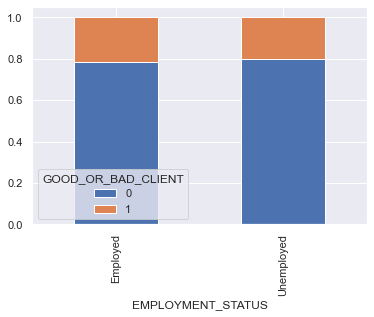

In [107]:
byEmployment.unstack().plot(kind='bar', stacked= True)
showfliers = False

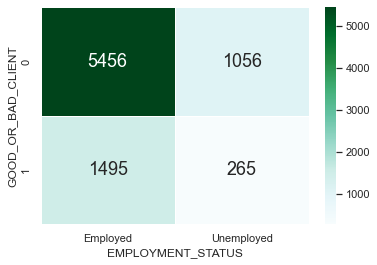

In [108]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(train.groupby(['GOOD_OR_BAD_CLIENT', 'EMPLOYMENT_STATUS']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
showfliers = False

#### We have noted the possibility of Simpson's paradox and hence would also be introducing a third variable, as 'AGE_YEARS'

>Simpson's paradox is an effect that occurs when the marginal association between two categorical variables is qualitatively different from the partial association between the same two variables after controlling for one or more other variables.

In [109]:
#By introducing a third variable to check if it affects the relationship between the first two variables
#Taking into accound Simpson's Paradox
byAge = train.groupby(["ageGroup", "EMPLOYMENT_STATUS"]).GOOD_OR_BAD_CLIENT.value_counts(normalize=True)
byAge

ageGroup  EMPLOYMENT_STATUS  GOOD_OR_BAD_CLIENT
21-25     Employed           0                    0.78
                             1                    0.22
          Unemployed         1                    0.67
                             0                    0.33
26-30     Employed           0                    0.76
                             1                    0.24
          Unemployed         0                    0.71
                             1                    0.29
31-35     Employed           0                    0.76
                             1                    0.24
          Unemployed         0                    1.00
36-40     Employed           0                    0.81
                             1                    0.19
          Unemployed         0                    0.75
                             1                    0.25
41-45     Employed           0                    0.79
                             1                    0.21
          Unemplo

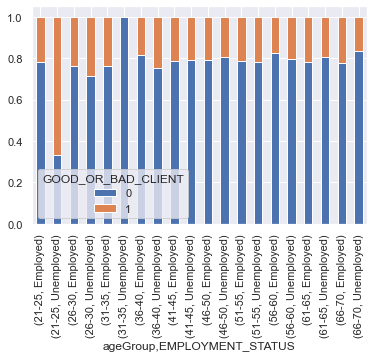

In [110]:
#Plotting above findings onto a graph to derive
byAge.unstack().plot(kind='bar', stacked=True)
showfliers = False

#### We also noted the possibility of Simpson's paradox and hence would also be introducing a third variable, as 'YEARS_EMPLOYED'
>Simpson's paradox is an effect that occurs when the marginal association between two categorical variables is qualitatively different from the partial association between the same two variables after controlling for one or more other variables.
>
>
>For this, we will only consider years employed from 1 years onwards due to years employed = 0 may not be a very reliable factor as a third factor in determining the client's number of years employed to the relationship between if they are "a good or a bad client" to their employement status

In [111]:
#By introducing a third variable to check if it affects the relationship between the first two variables
#Taking into accound Simpson's Paradox
byyearsE = train.groupby(["yearsEGroup", "EMPLOYMENT_STATUS"]).GOOD_OR_BAD_CLIENT.value_counts(normalize=True)
byyearsE

yearsEGroup  EMPLOYMENT_STATUS  GOOD_OR_BAD_CLIENT
1-5          Employed           0                    0.79
                                1                    0.21
6-10         Employed           0                    0.78
                                1                    0.22
11-15        Employed           0                    0.79
                                1                    0.21
16-20        Employed           0                    0.81
                                1                    0.19
Name: GOOD_OR_BAD_CLIENT, dtype: float64

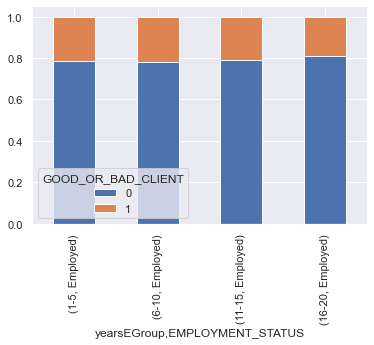

In [112]:
#Plotting above findings onto a graph to derive
byyearsE.unstack().plot(kind='bar', stacked=True)
showfliers = False

#### Conclusion:
>From this, we have noted that a person's employement status (whether employed or unemployed), may not be a good Predictor for a Response value if a client if good or bad - which is determinant of their repayment period. 
>>This notion remains consistent even when another third variable; the age of the client is introduced.
>>
>>Even when the third variable introduced is changed to the client's years of employment, there is not a significant relationship which can be observed
>
>From these, we can conclude that a person's employment status may not be a good Predictor for a Response value (if a client if good or bad) - which is determinant of their repayment period.

---

### Occupation Type
 On a bigger picture, we have noted that our client's employment status may not be a very good response variable. However, we would explore in the smaller picture if this is still the same, taking into account their occupation type

In [113]:
pd.DataFrame(train.OCCUPATION_TYPE.value_counts())

OCCUPATION_TYPE
Laborers                          1452
Unemployed                        1321
Unknown                           1107
Sales staff                        889
Core staff                         731
Managers                           708
Drivers                            553
High skill tech staff              318
Accountants                        266
Medicine staff                     212
Security staff                     176
Cooking staff                      162
Cleaning staff                     124
Private service staff               69
Secretaries                         47
Low-skill Laborers                  45
Waiters/barmen staff                33
HR staff                            28
IT staff                            16
Realty agents                       15

In [114]:
#breakdown into their respective occupation type
byOcccupation = train.groupby("OCCUPATION_TYPE").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byOcccupation

OCCUPATION_TYPE        GOOD_OR_BAD_CLIENT
Accountants            0                    0.77
                       1                    0.23
Cleaning staff         0                    0.79
                       1                    0.21
Cooking staff          0                    0.79
                       1                    0.21
Core staff             0                    0.77
                       1                    0.23
Drivers                0                    0.78
                       1                    0.22
HR staff               0                    0.64
                       1                    0.36
High skill tech staff  0                    0.79
                       1                    0.21
IT staff               0                    0.81
                       1                    0.19
Laborers               0                    0.80
                       1                    0.20
Low-skill Laborers     0                    0.71
                       1   

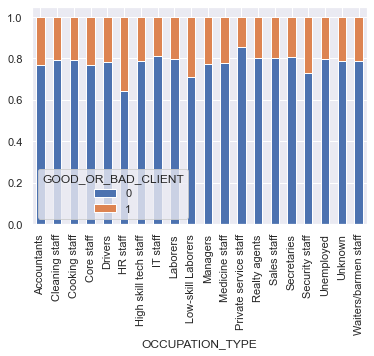

In [115]:
byOcccupation.unstack().plot(kind='bar', stacked= True)
showfliers = False

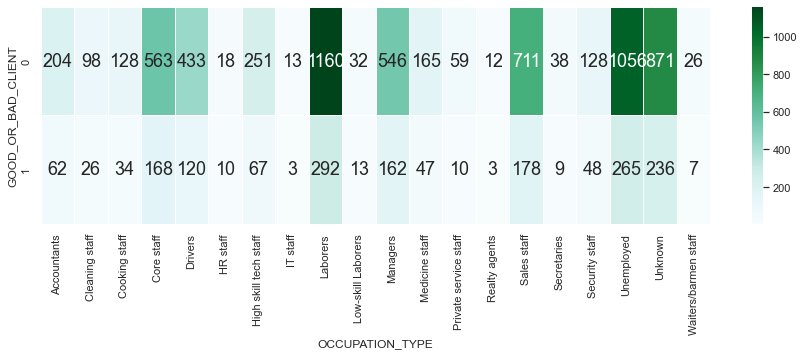

In [116]:
# Rating vs History of Payment
f = plt.figure(figsize=(15, 4))
sb.heatmap(train.groupby(["GOOD_OR_BAD_CLIENT", "OCCUPATION_TYPE"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
showfliers = False

#### Conclusion:
>As seen here, both in the bigger picture (their employment status) and smaller picture (their occupation type) may not be a good Predictor for the Response variable (if a client if good or bad) - which is determinant of their repayment period.
>
>We will now explore the other variables.\
> Furthermore, we initially replaced the NA values in OCCUPATION to "Unknown". After the data visualisation, we realised that the column should be dropped as the column data might not be reliable

---

### Education Type
We will now check Education Type as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [117]:
pd.DataFrame(train.NAME_EDUCATION_TYPE.value_counts())

NAME_EDUCATION_TYPE
Secondary / secondary special                 5660
Higher education                              2164
Incomplete higher                              341
Lower secondary                                101
Academic degree                                  6

In [118]:
#breakdown into their respective education type
byEducation = train.groupby("NAME_EDUCATION_TYPE").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byEducation

NAME_EDUCATION_TYPE            GOOD_OR_BAD_CLIENT
Academic degree                0                    0.83
                               1                    0.17
Higher education               0                    0.78
                               1                    0.22
Incomplete higher              0                    0.77
                               1                    0.23
Lower secondary                0                    0.84
                               1                    0.16
Secondary / secondary special  0                    0.79
                               1                    0.21
Name: GOOD_OR_BAD_CLIENT, dtype: float64

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

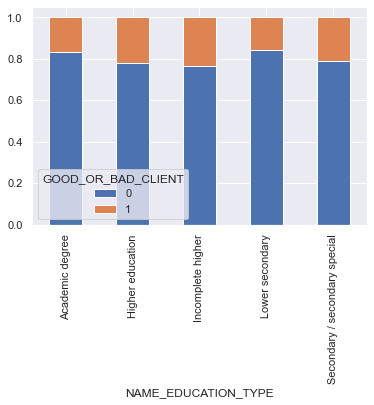

In [119]:
byEducation.unstack().plot(kind='bar', stacked= True)

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='GOOD_OR_BAD_CLIENT'>

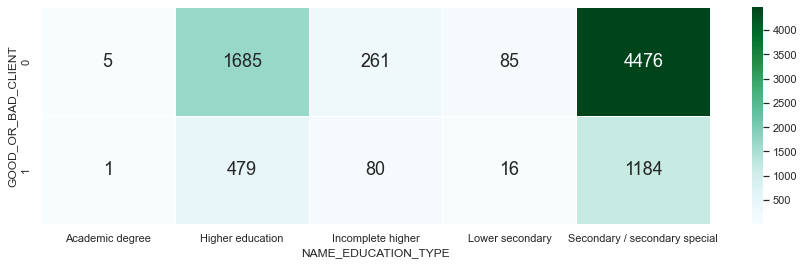

In [120]:
# Rating vs History of Payment
f = plt.figure(figsize=(15, 4))
sb.heatmap(train.groupby(["GOOD_OR_BAD_CLIENT", "NAME_EDUCATION_TYPE"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

---

### Housing Type
 We will now check Housing Type as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

In [121]:
pd.DataFrame(train.NAME_HOUSING_TYPE.value_counts())

NAME_HOUSING_TYPE
House / apartment                 7341
With parents                       409
Municipal apartment                284
Rented apartment                   147
Office apartment                    67
Co-op apartment                     24

In [122]:
#breakdown into their respective occupation type
byHousing = train.groupby("NAME_HOUSING_TYPE").GOOD_OR_BAD_CLIENT.value_counts(normalize=True).sort_index()
byHousing

NAME_HOUSING_TYPE    GOOD_OR_BAD_CLIENT
Co-op apartment      0                    0.83
                     1                    0.17
House / apartment    0                    0.79
                     1                    0.21
Municipal apartment  0                    0.78
                     1                    0.22
Office apartment     0                    0.73
                     1                    0.27
Rented apartment     0                    0.73
                     1                    0.27
With parents         0                    0.76
                     1                    0.24
Name: GOOD_OR_BAD_CLIENT, dtype: float64

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

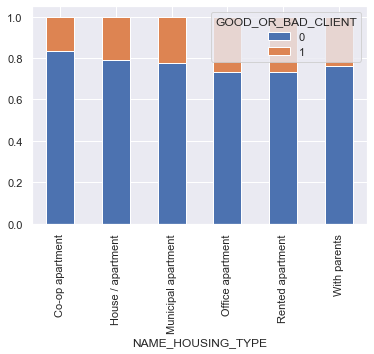

In [123]:
byHousing.unstack().plot(kind='bar', stacked= True)

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='GOOD_OR_BAD_CLIENT'>

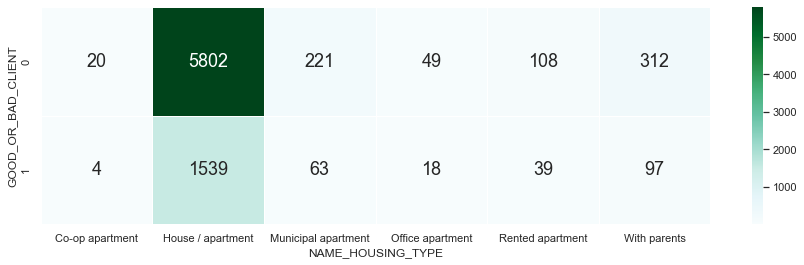

In [124]:
# Rating vs History of Payment
f = plt.figure(figsize=(15, 4))
sb.heatmap(train.groupby(["GOOD_OR_BAD_CLIENT", "NAME_HOUSING_TYPE"]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

---

### Client's Income
 We will now check the Client's Income as a Predictor variable to the Response variable (if a client if good or bad) - which is determinant of their repayment period.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='GOOD_OR_BAD_CLIENT'>

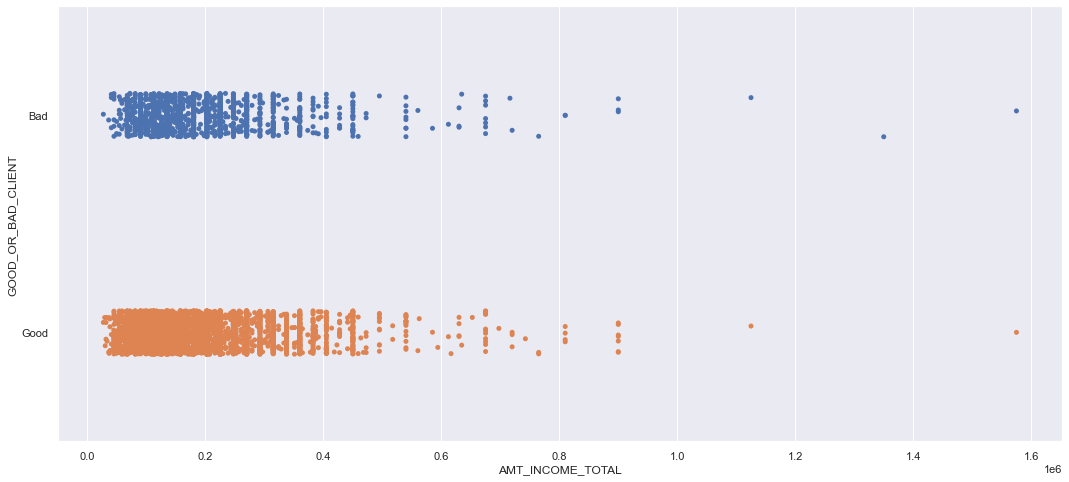

In [125]:
# Distribution of income of 'Good' and 'Bad' clients
f = plt.figure(figsize=(18, 8))
temp_df = train.copy()
temp_df['GOOD_OR_BAD_CLIENT'].replace([0],'Good',inplace = True)
temp_df['GOOD_OR_BAD_CLIENT'].replace([1],'Bad',inplace = True)
sb.stripplot(x = 'AMT_INCOME_TOTAL', y = 'GOOD_OR_BAD_CLIENT', data = temp_df)

### Comments:
From the above analysis and Data Visualisation, we could not confidently determine what is a "good" or "bad" predictor. However, we have a better understanding of each different predictor affects our response variable.

Hence, we will proceed to use Cross-Validation below together with our Machine Learning Models.

<hr style="border:2px solid gray"> </hr>

## Further pre-processing of Data for Machine Learning Models

In [126]:
final_df = final_df.reset_index()
final_df

index       ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0          0  5008804           M            Y               Y             0   
1          2  5008806           M            Y               Y             0   
2          3  5008808           F            N               Y             0   
3          7  5008812           F            N               Y             0   
4         10  5008815           M            Y               Y             0   
...      ...      ...         ...          ...             ...           ...   
10335  33808  5149055           F            N               Y             0   
10336  33813  5149729           M            Y               Y             0   
10337  33814  5149828           M            Y               Y             0   
10338  33816  5149838           F            N               Y             0   
10339  33818  5150337           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0            427,500.00               Working               Higher education   
1            112,500.00               Working  Secondary / secondary special   
2            270,000.00  Commercial associate  Secondary / secondary special   
3            283,500.00             Pensioner               Higher education   
4            270,000.00               Working               Higher education   
...                 ...                   ...                            ...   
10335        112,500.00  Commercial associate  Secondary / secondary special   
10336         90,000.00               Working  Secondary / secondary special   
10337        315,000.00               Working  Secondary / secondary special   
10338        157,500.00             Pensioner               Higher education   
10339        112,500.00               Working  Secondary / secondary special   

         NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  AGE_YEARS  YEARS_EMPLOYED  \
0            Civil marriage   Rented apartment         33              12   
1                   Married  House / apartment         59               3   
2      Single / not married  House / apartment         52               8   
3                 Separated  House / apartment         62               0   
4                   Married  House / apartment         46               2   
...                     ...                ...        ...             ...   
10335               Married  House / apartment         43               7   
10336               Married  House / apartment         52               5   
10337               Married  House / apartment         48               7   
10338               Married  House / apartment         34               4   
10339  Single / not married   Rented apartment         25               3   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  GOOD_OR_BAD_CLIENT  
0             Unknown                2                   1  
1      Security staff                2                   0  
2         Sales staff                1                   0  
3          Unemployed                1                   0  
4         Accountants                2                   0  
...               ...              ...                 ...  
10335         Unknown                2                   1  
10336         Unknown                2                   1  
10337        Managers                2                   1  
10338  Medicine staff                2                   1  
10339        Laborers                1                   1  

[10340 rows x 16 columns]

In [127]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10340 entries, 0 to 10339
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                10340 non-null  int64  
 1   ID                   10340 non-null  int64  
 2   CODE_GENDER          10340 non-null  object 
 3   FLAG_OWN_CAR         10340 non-null  object 
 4   FLAG_OWN_REALTY      10340 non-null  object 
 5   CNT_CHILDREN         10340 non-null  int64  
 6   AMT_INCOME_TOTAL     10340 non-null  float64
 7   NAME_INCOME_TYPE     10340 non-null  object 
 8   NAME_EDUCATION_TYPE  10340 non-null  object 
 9   NAME_FAMILY_STATUS   10340 non-null  object 
 10  NAME_HOUSING_TYPE    10340 non-null  object 
 11  AGE_YEARS            10340 non-null  int64  
 12  YEARS_EMPLOYED       10340 non-null  int64  
 13  OCCUPATION_TYPE      10340 non-null  object 
 14  CNT_FAM_MEMBERS      10340 non-null  int64  
 15  GOOD_OR_BAD_CLIENT   10340 non-null 

#### Comments:
>We have noted that since there are data with type 'object', we would have to use one-hot encoding

### One-hot Encoding
We have noted that we are unable to use a normal decision tree to handle categorical data. Hence, we would need to deal with the categorical features
> However, we cannot just randomly assign values of index for each of the categorical data
>> Categories are unordered so by assignig them a value for index, it would imply that there are some forms of order involved. This would greatly penalize the effectiveness of the model
>
>>Cannot allocate arbitrary numbers to each category but instead encoded by creating additional binary features corresponding to whether each value was picked or not.
>
>>This allows our model to leverage the information of what country is given without inferring any order between the different options

There are three main ways to encode categorical features
- One-hot Encoding
- Dummy Encoding
- Label Encoding

We decide to use One-hot Encoding as it is the most applicable for our data-set.

In [128]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response) removing column "ID" 
final_df_cat = final_df[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']]
ohe.fit(final_df_cat)
final_df_cat_ohe = pd.DataFrame(ohe.transform(final_df_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(final_df_cat.columns))

# Check the encoded variables
final_df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10340 entries, 0 to 10339
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CODE_GENDER_F                                      10340 non-null  float64
 1   CODE_GENDER_M                                      10340 non-null  float64
 2   FLAG_OWN_CAR_N                                     10340 non-null  float64
 3   FLAG_OWN_CAR_Y                                     10340 non-null  float64
 4   FLAG_OWN_REALTY_N                                  10340 non-null  float64
 5   FLAG_OWN_REALTY_Y                                  10340 non-null  float64
 6   NAME_INCOME_TYPE_Commercial associate              10340 non-null  float64
 7   NAME_INCOME_TYPE_Pensioner                         10340 non-null  float64
 8   NAME_INCOME_TYPE_State servant                     10340 non-null  float64
 9   NAME_I

In [129]:
final_df_cat_ohe

CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  \
0               0.00           1.00            0.00            1.00   
1               0.00           1.00            0.00            1.00   
2               1.00           0.00            1.00            0.00   
3               1.00           0.00            1.00            0.00   
4               0.00           1.00            0.00            1.00   
...              ...            ...             ...             ...   
10335           1.00           0.00            1.00            0.00   
10336           0.00           1.00            0.00            1.00   
10337           0.00           1.00            0.00            1.00   
10338           1.00           0.00            1.00            0.00   
10339           0.00           1.00            1.00            0.00   

       FLAG_OWN_REALTY_N  FLAG_OWN_REALTY_Y  \
0                   0.00               1.00   
1                   0.00               1.00   
2                   0.00               1.00   
3                   0.00               1.00   
4                   0.00               1.00   
...                  ...                ...   
10335               0.00               1.00   
10336               0.00               1.00   
10337               0.00               1.00   
10338               0.00               1.00   
10339               0.00               1.00   

       NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Pensioner  \
0                                       0.00                        0.00   
1                                       0.00                        0.00   
2                                       1.00                        0.00   
3                                       0.00                        1.00   
4                                       0.00                        0.00   
...                                      ...                         ...   
10335                                   1.00                        0.00   
10336                                   0.00                        0.00   
10337                                   0.00                        0.00   
10338                                   0.00                        1.00   
10339                                   0.00                        0.00   

       NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  ...  \
0                                0.00                      0.00  ...   
1                                0.00                      0.00  ...   
2                                0.00                      0.00  ...   
3                                0.00                      0.00  ...   
4                                0.00                      0.00  ...   
...                               ...                       ...  ...   
10335                            0.00                      0.00  ...   
10336                            0.00                      0.00  ...   
10337                            0.00                      0.00  ...   
10338                            0.00                      0.00  ...   
10339                            0.00                      0.00  ...   

       OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                          0.00                            0.00   
1                          0.00                            0.00   
2                          0.00                            0.00   
3                          0.00                            0.00   
4                          0.00                            0.00   
...                         ...                             ...   
10335                      0.00                            0.00   
10336                      0.00                            0.00   
10337                      1.00                            0.00   
10338                      0.00                            1.00   
10339                      0.00                            0.00   

      

In [130]:
final_df_cat_ohe.info() # checking data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10340 entries, 0 to 10339
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CODE_GENDER_F                                      10340 non-null  float64
 1   CODE_GENDER_M                                      10340 non-null  float64
 2   FLAG_OWN_CAR_N                                     10340 non-null  float64
 3   FLAG_OWN_CAR_Y                                     10340 non-null  float64
 4   FLAG_OWN_REALTY_N                                  10340 non-null  float64
 5   FLAG_OWN_REALTY_Y                                  10340 non-null  float64
 6   NAME_INCOME_TYPE_Commercial associate              10340 non-null  float64
 7   NAME_INCOME_TYPE_Pensioner                         10340 non-null  float64
 8   NAME_INCOME_TYPE_State servant                     10340 non-null  float64
 9   NAME_I

In [131]:
final_df_num = final_df[['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE_YEARS','YEARS_EMPLOYED','CNT_FAM_MEMBERS']]
final_df_num

CNT_CHILDREN  AMT_INCOME_TOTAL  AGE_YEARS  YEARS_EMPLOYED  \
0                 0        427,500.00         33              12   
1                 0        112,500.00         59               3   
2                 0        270,000.00         52               8   
3                 0        283,500.00         62               0   
4                 0        270,000.00         46               2   
...             ...               ...        ...             ...   
10335             0        112,500.00         43               7   
10336             0         90,000.00         52               5   
10337             0        315,000.00         48               7   
10338             0        157,500.00         34               4   
10339             0        112,500.00         25               3   

       CNT_FAM_MEMBERS  
0                    2  
1                    2  
2                    1  
3                    1  
4                    2  
...                ...  
10335                2  
10336                2  
10337                2  
10338                2  
10339                1  

[10340 rows x 5 columns]

In [132]:
# Combining Numeric features with the OHE Categorical features

final_df_res = final_df['GOOD_OR_BAD_CLIENT']
final_df_ohe = pd.concat([final_df_num,final_df_cat_ohe,final_df_res], 
                           sort = False, axis = 1).reindex(index = final_df_num.index)

# Check the final dataframe
final_df_ohe

CNT_CHILDREN  AMT_INCOME_TOTAL  AGE_YEARS  YEARS_EMPLOYED  \
0                 0        427,500.00         33              12   
1                 0        112,500.00         59               3   
2                 0        270,000.00         52               8   
3                 0        283,500.00         62               0   
4                 0        270,000.00         46               2   
...             ...               ...        ...             ...   
10335             0        112,500.00         43               7   
10336             0         90,000.00         52               5   
10337             0        315,000.00         48               7   
10338             0        157,500.00         34               4   
10339             0        112,500.00         25               3   

       CNT_FAM_MEMBERS  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
0                    2           0.00           1.00            0.00   
1                    2           0.00           1.00            0.00   
2                    1           1.00           0.00            1.00   
3                    1           1.00           0.00            1.00   
4                    2           0.00           1.00            0.00   
...                ...            ...            ...             ...   
10335                2           1.00           0.00            1.00   
10336                2           0.00           1.00            0.00   
10337                2           0.00           1.00            0.00   
10338                2           1.00           0.00            1.00   
10339                1           0.00           1.00            1.00   

       FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_N  ...  OCCUPATION_TYPE_Medicine staff  \
0                1.00               0.00  ...                            0.00   
1                1.00               0.00  ...                            0.00   
2                0.00               0.00  ...                            0.00   
3                0.00               0.00  ...                            0.00   
4                1.00               0.00  ...                            0.00   
...               ...                ...  ...                             ...   
10335            0.00               0.00  ...                            0.00   
10336            1.00               0.00  ...                            0.00   
10337            1.00               0.00  ...                            0.00   
10338            0.00               0.00  ...                            1.00   
10339            0.00               0.00  ...                            0.00   

       OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                       0.00                           0.00   
1                                       0.00                           0.00   
2                                       0.00                           0.00   
3                                       0.00                           0.00   
4                                       0.00                           0.00   
...                                      ...                            ...   
10335                                   0.00                           0.00   
10336                                   0.00                           0.00   
10337                                   0.00                           0.00   
10338                                   0.00                           0.00   
10339                                   0.00                           0.00   

       OCCUPATION_TYPE_Sales staff  OCCUPATION_TYPE_Secretaries  \
0                             0.00                         0.00   
1                             0.00                         0.00   
2                             1.00                         0.00   
3                             0.00                         0.00   
4                             0.00                         0.00   
.

In [133]:
final_df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10340 entries, 0 to 10339
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       10340 non-null  int64  
 1   AMT_INCOME_TOTAL                                   10340 non-null  float64
 2   AGE_YEARS                                          10340 non-null  int64  
 3   YEARS_EMPLOYED                                     10340 non-null  int64  
 4   CNT_FAM_MEMBERS                                    10340 non-null  int64  
 5   CODE_GENDER_F                                      10340 non-null  float64
 6   CODE_GENDER_M                                      10340 non-null  float64
 7   FLAG_OWN_CAR_N                                     10340 non-null  float64
 8   FLAG_OWN_CAR_Y                                     10340 non-null  float64
 9   FLAG_O

<hr style="border:2px solid gray"> </hr>

## Machine Learning Techniques

### Model 1 : Decision Tree Classification

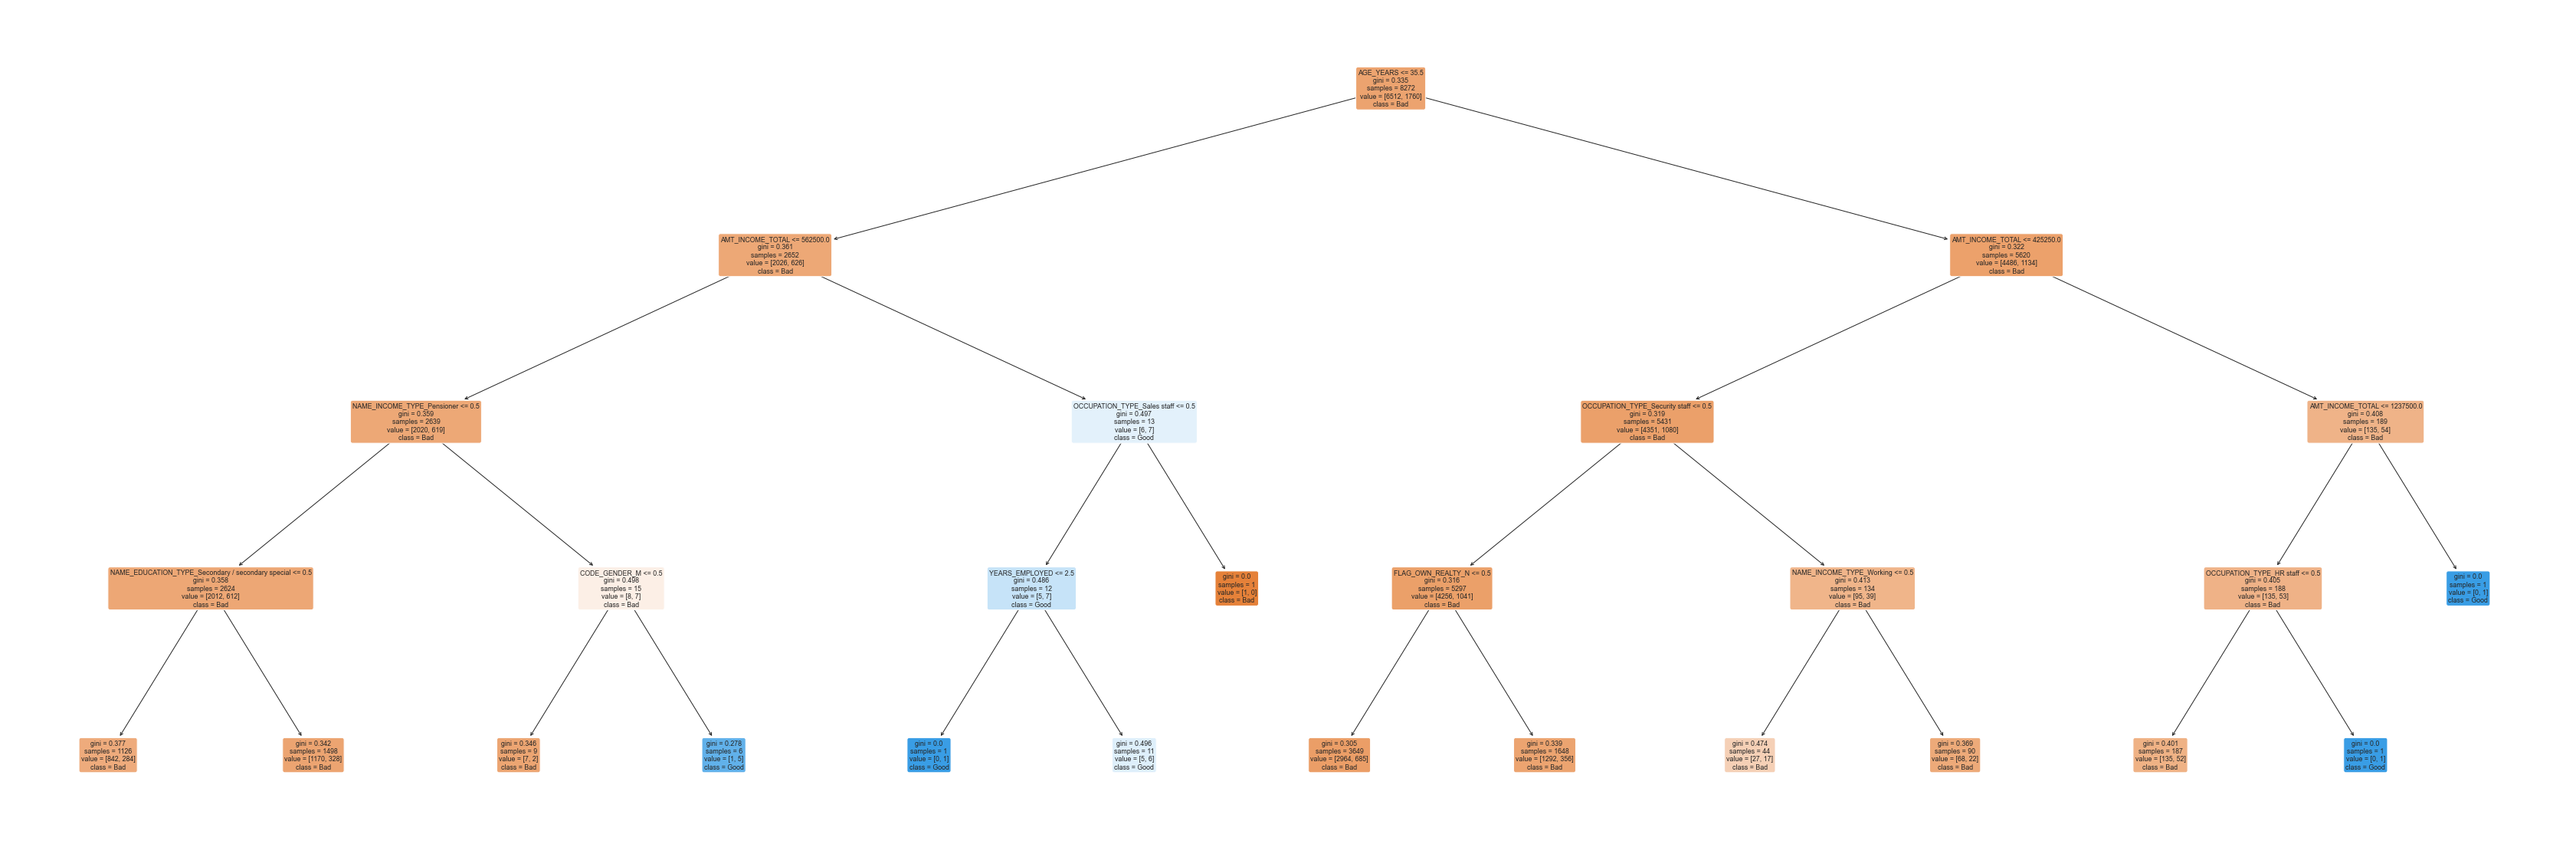

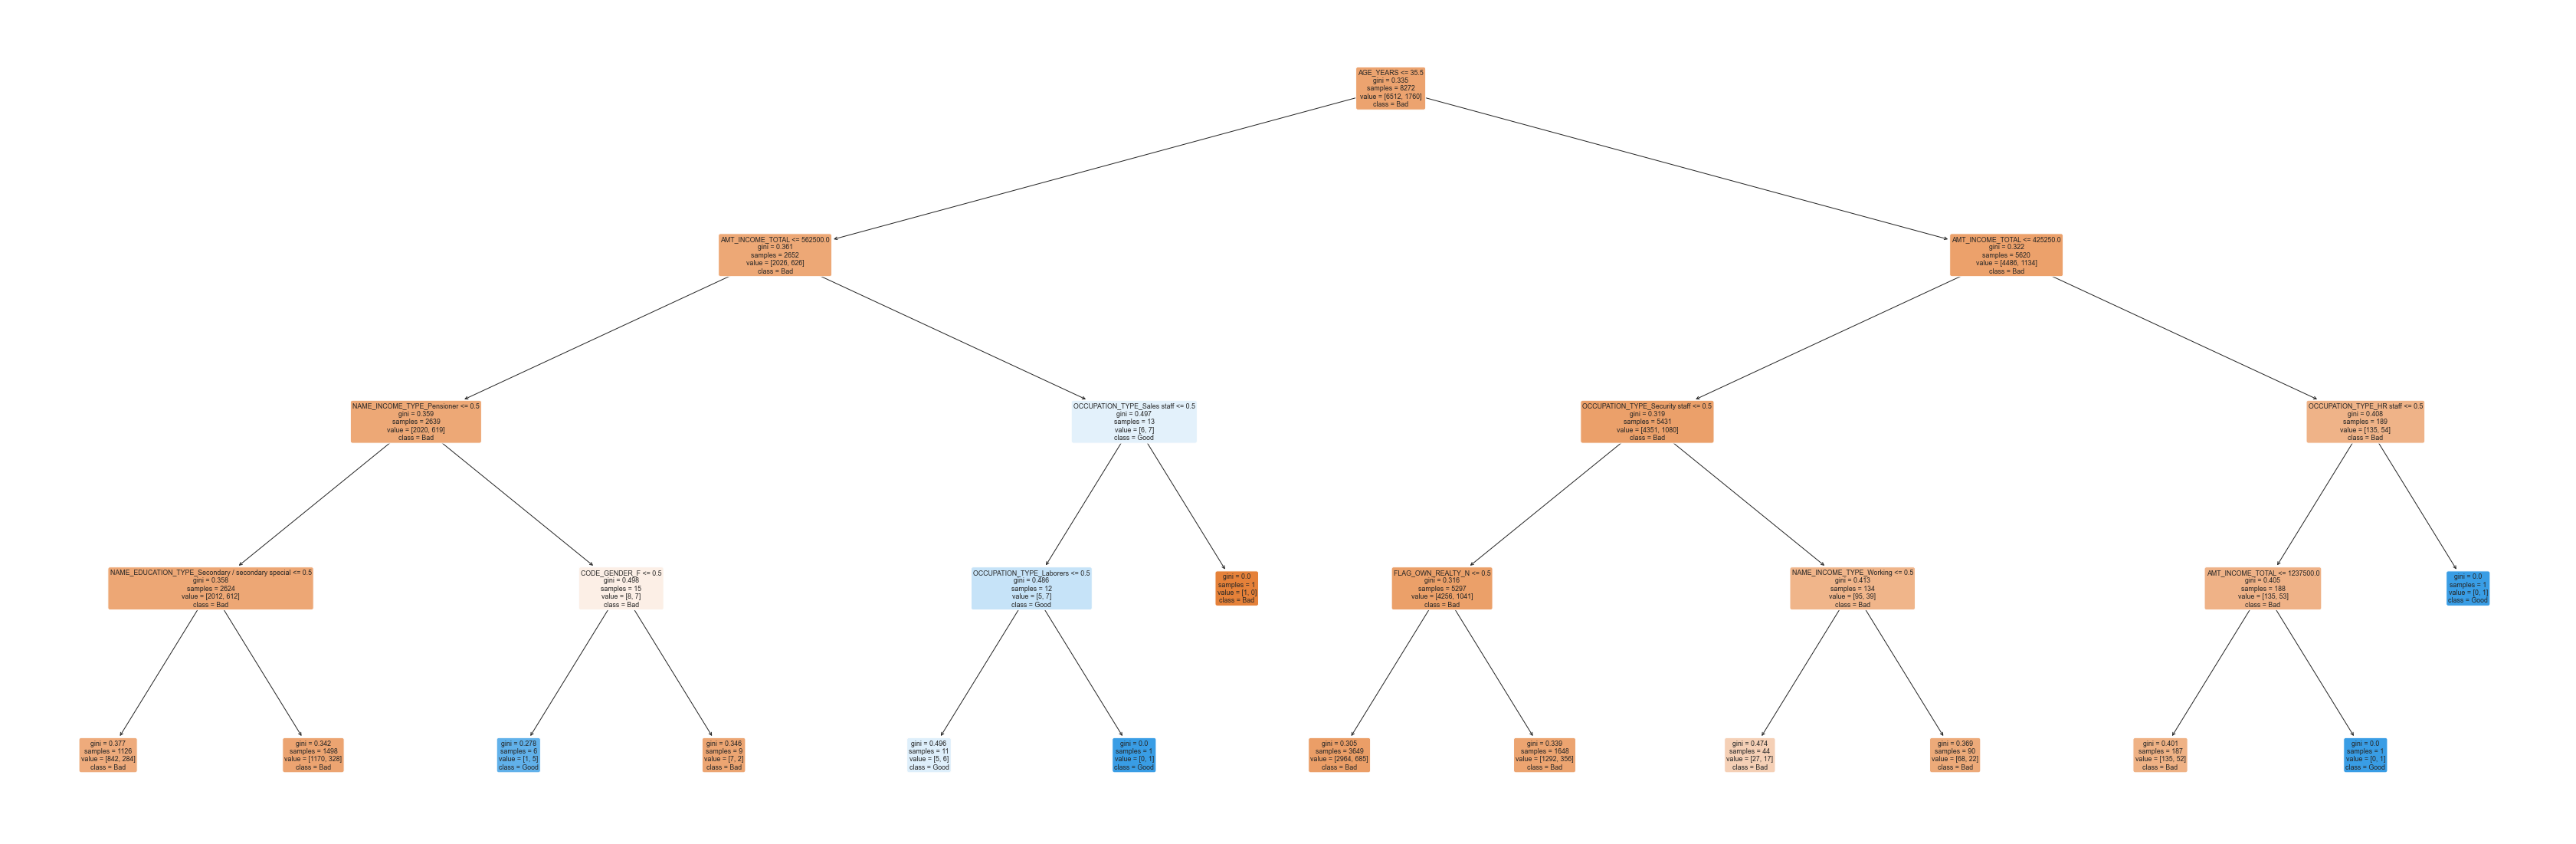

In [134]:
# Import essential models and functions from sklearn
# random seed = 42
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
label = pd.DataFrame(final_df_ohe['GOOD_OR_BAD_CLIENT'])
features = pd.DataFrame(final_df_ohe.drop('GOOD_OR_BAD_CLIENT', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2,random_state = 42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

dectree_2 = DecisionTreeClassifier(max_depth = 4)  
dectree_2.fit(X_train, y_train) 

# Plot the trained Decision Tree
f = plt.figure(figsize=(60,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Bad","Good"])
f = plt.figure(figsize=(60,20))
plot_tree(dectree_2, filled=True, rounded=True, 
          feature_names=X_test.columns, 
          class_names=["Bad","Good"])
showfliers = False

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy  :	 0.7882011605415861			 Model Accuracy :	  0.7804642166344294
True Positive Rate :	 0.007954545454545454			 True Positive Rate :	  0.0022123893805309734
True Negative Rate :	 0.9990786240786241			 True Negative Rate :	  0.9981435643564357

False Positive Rate :	 0.0009213759213759214			 False Positive Rate :	  0.0018564356435643563
False Negative Rate :	 0.9920454545454546			 False Negative Rate :	  0.9977876106194691


<AxesSubplot:>

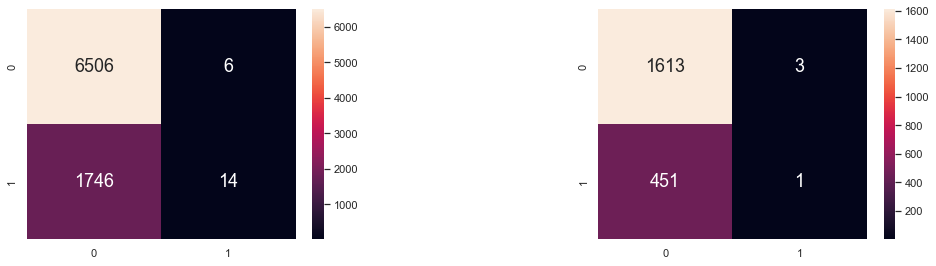

In [135]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
cmTest = confusion_matrix(y_test, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy  :\t", dectree.score(X_train, y_train), end = "")
print("\t\t\t Model Accuracy :\t ", dectree.score(X_test, y_test))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Comments:
> From the above analysis, we can see that the data is very imbalanced and biased towards "Good Clients" under column "GOOD_OR_BAD_CLIENTS". Hence, we decided to balance the dataset with the help of SMOTE.

---

## Balancing Dataset (Using SMOTE)

In [136]:
# Scaling all features
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()

label = pd.DataFrame(final_df_ohe['GOOD_OR_BAD_CLIENT'])
features = pd.DataFrame(final_df_ohe.drop('GOOD_OR_BAD_CLIENT', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2,random_state = 42)

X_train_scaled = pd.DataFrame(minMax.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(minMax.transform(X_test), columns = X_test.columns)

In [137]:
# Using SMOTE on scaled dataset
from imblearn.over_sampling import SMOTE
upSample = SMOTE()

X_train_bal, y_train_bal = upSample.fit_resample(X_train_scaled, y_train)
X_test_bal, y_test_bal = upSample.fit_resample(X_test_scaled, y_test)

In [138]:
# Before SMOTE
y_train.value_counts(normalize = True)

GOOD_OR_BAD_CLIENT
0                    0.79
1                    0.21
dtype: float64

In [139]:
# After SMOTE
y_train_bal.value_counts(normalize = True)

GOOD_OR_BAD_CLIENT
0                    0.50
1                    0.50
dtype: float64

### Model 1b : Decision Tree Classification (After Balancing of Data)


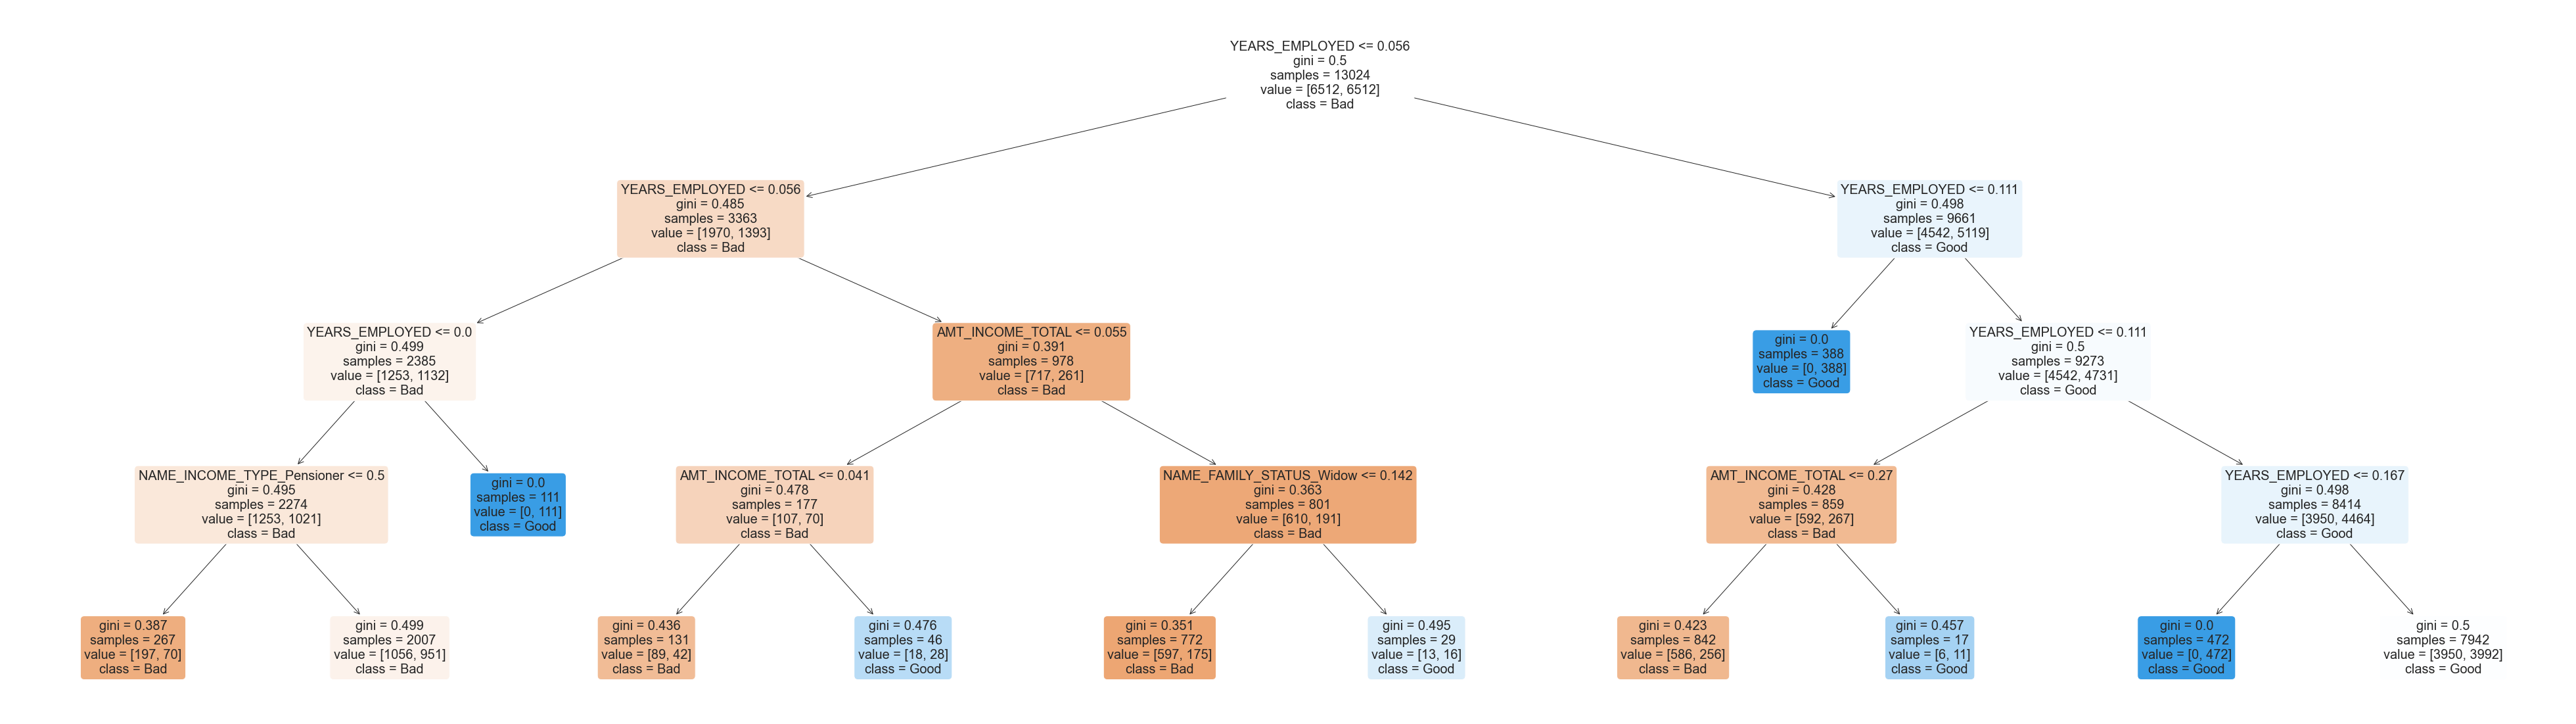

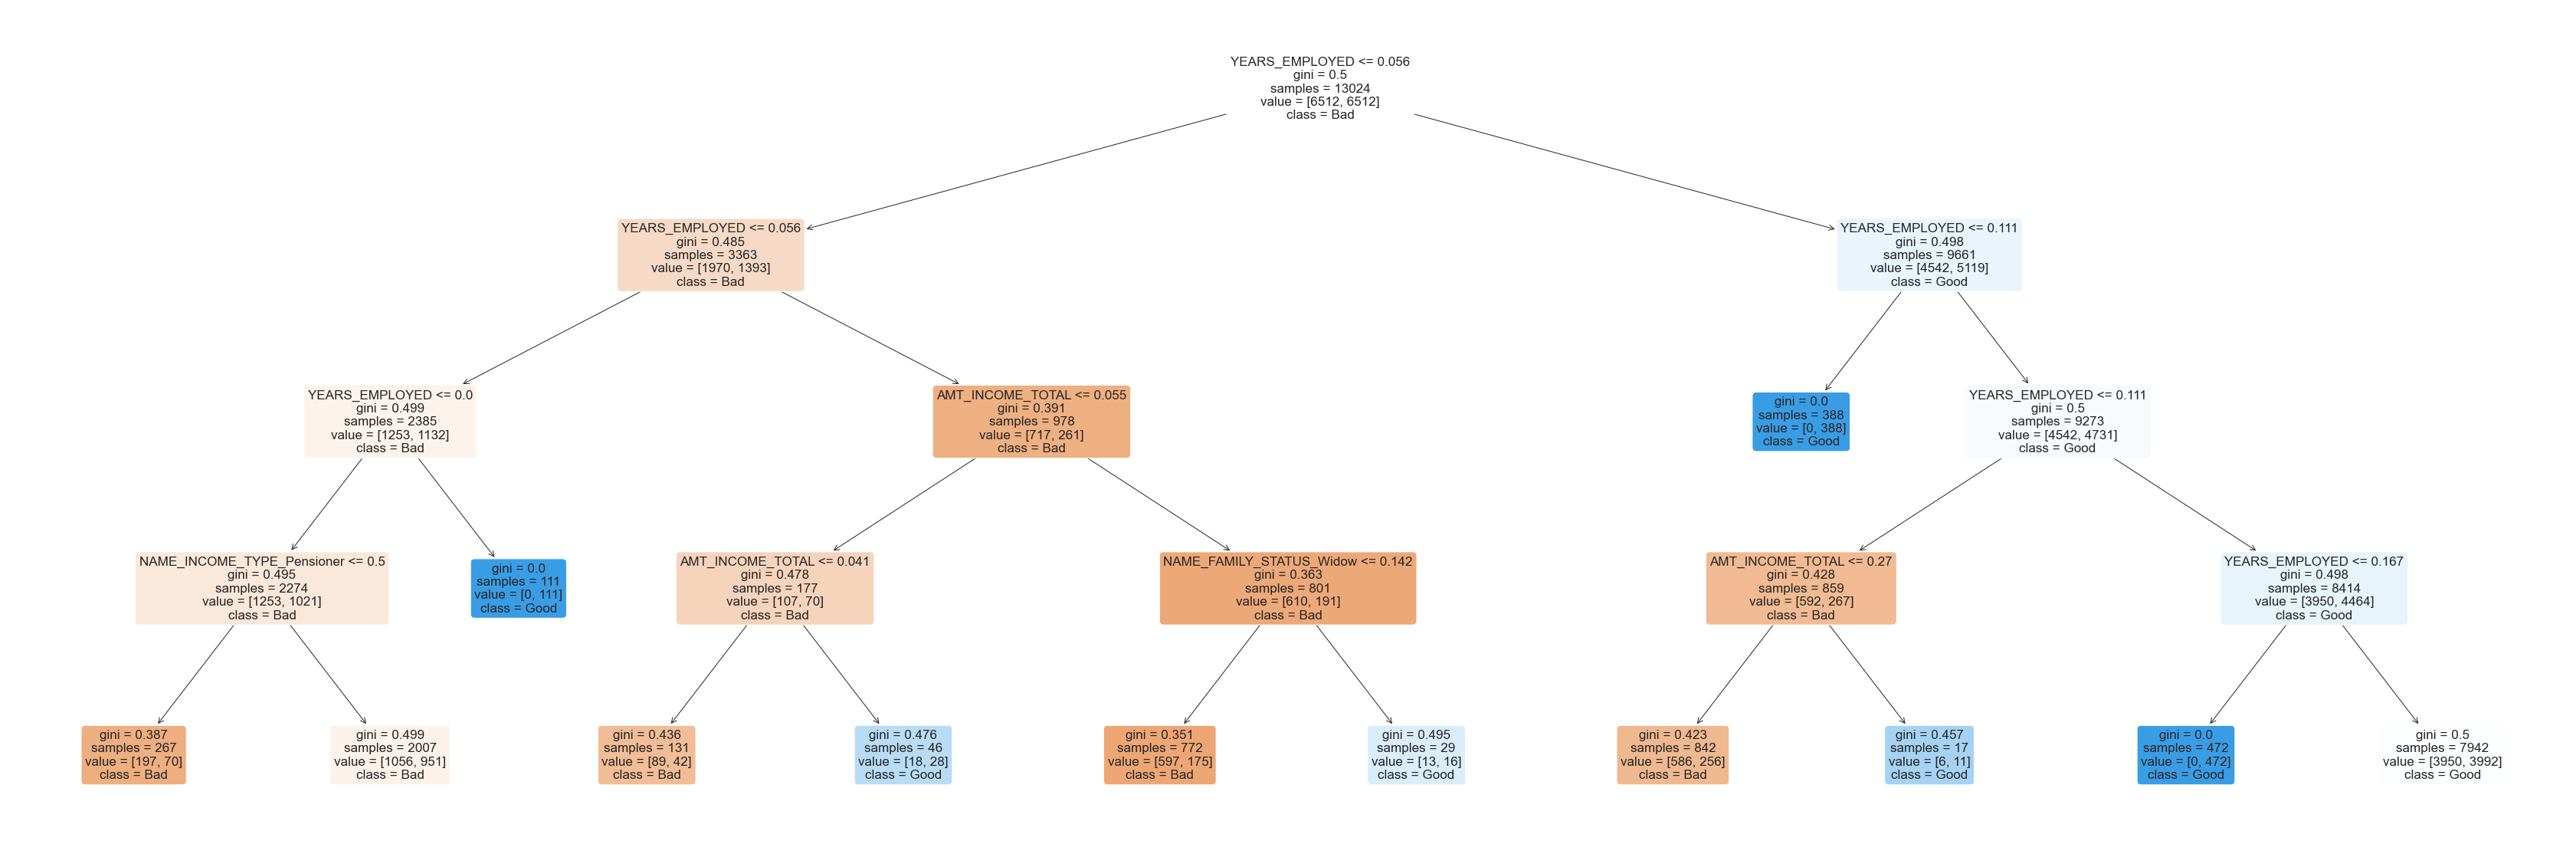

In [140]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train_bal, y_train_bal)                    # train the decision tree model

dectree_2 = DecisionTreeClassifier(max_depth = 4)  
dectree_2.fit(X_train_bal, y_train_bal) 

# Plot the trained Decision Tree
f = plt.figure(figsize=(70,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train_bal.columns, 
          class_names=["Bad","Good"])
f = plt.figure(figsize=(60,20))
plot_tree(dectree_2, filled=True, rounded=True, 
          feature_names=X_test_bal.columns, 
          class_names=["Bad","Good"])
showfliers = False

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.579161547911548			 Model Accuracy :	  0.5779702970297029
True Positive Rate :	 0.7705773955773956			 True Positive Rate :	  0.7438118811881188
True Negative Rate :	 0.38774570024570026			 True Negative Rate :	  0.4121287128712871

False Positive Rate :	 0.6122542997542998			 False Positive Rate :	  0.5878712871287128
False Negative Rate :	 0.22942260442260443			 False Negative Rate :	  0.2561881188118812


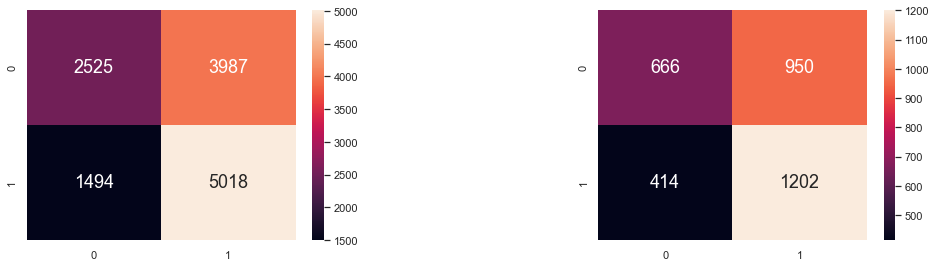

In [141]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_bal)
y_test_pred = dectree.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", dectree.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", dectree.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

In [142]:
print(classification_report(y_test_bal, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.41      0.49      1616
           1       0.56      0.74      0.64      1616

    accuracy                           0.58      3232
   macro avg       0.59      0.58      0.57      3232
weighted avg       0.59      0.58      0.57      3232



#### Remarks:
> Precision : defined as the ratio of true positives to the sum of true and false positives. \
> Recall : defined as the ratio of true positives to the sum of true positives and false negatives. \
> F1: the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.\
> Support : number of actual occurrences of the class in the dataset 

### Comments:
Even though the accuracy of the model decreased, we can see that with the help of SMOTE our data is much more balanced, therefore giving a better analysis shown by the True Positive Rate and False Positive Rate

Hence, we will continue using the train-test data which is balanced by SMOTE for our remaining models.

---

### Model 2: Random Forest

In [143]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train_bal, y_train_bal.GOOD_OR_BAD_CLIENT.ravel())
showfliers = False

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.644041769041769			 Model Accuracy :	  0.6324257425742574
True Positive Rate :	 0.6833538083538083			 True Positive Rate :	  0.6522277227722773
True Negative Rate :	 0.6047297297297297			 True Negative Rate :	  0.6126237623762376

False Positive Rate :	 0.3952702702702703			 False Positive Rate :	  0.3873762376237624
False Negative Rate :	 0.3166461916461916			 False Negative Rate :	  0.34777227722772275


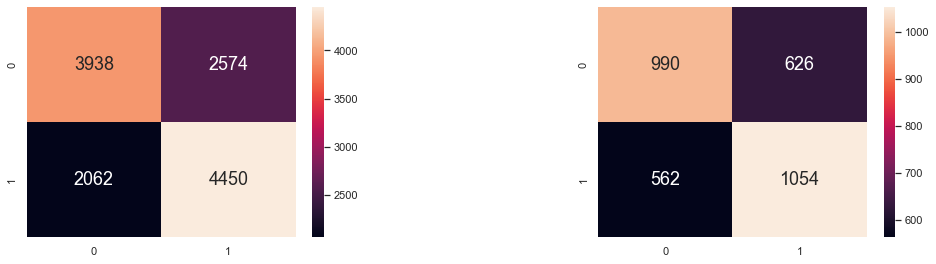

In [144]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train_bal)
y_test_pred = rforest.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", rforest.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", rforest.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

#### Case 1: Increase the number of decision trees in the forest

In [145]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train_bal, y_train_bal.GOOD_OR_BAD_CLIENT.ravel())
showfliers = False

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.652027027027027			 Model Accuracy :	  0.6324257425742574
True Positive Rate :	 0.6951781326781327			 True Positive Rate :	  0.6497524752475248
True Negative Rate :	 0.6088759213759214			 True Negative Rate :	  0.6150990099009901

False Positive Rate :	 0.3911240786240786			 False Positive Rate :	  0.3849009900990099
False Negative Rate :	 0.30482186732186733			 False Negative Rate :	  0.3502475247524752


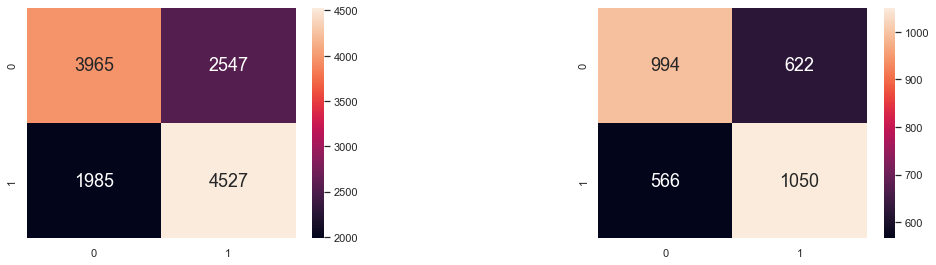

In [146]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train_bal)
y_test_pred = rforest.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", rforest.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", rforest.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

#### Case 2: Increase the depth of decision tree in random forest with the increase in number of decision trees


In [147]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train_bal, y_train_bal.GOOD_OR_BAD_CLIENT.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.7940724815724816			 Model Accuracy :	  0.7326732673267327
True Positive Rate :	 0.7641277641277642			 True Positive Rate :	  0.6837871287128713
True Negative Rate :	 0.824017199017199			 True Negative Rate :	  0.781559405940594

False Positive Rate :	 0.17598280098280097			 False Positive Rate :	  0.21844059405940594
False Negative Rate :	 0.23587223587223588			 False Negative Rate :	  0.3162128712871287


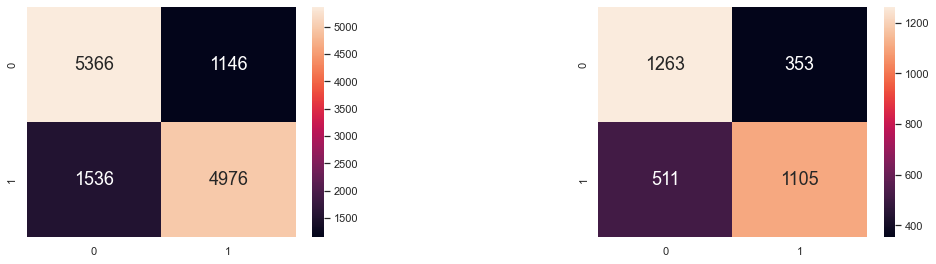

In [148]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train_bal)
y_test_pred = rforest.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", rforest.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", rforest.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

#### Case 3 : GridSearch Cross-Validation to find best depth and n_estimators

In [149]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train_bal, y_train_bal.GOOD_OR_BAD_CLIENT.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [150]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=1000)
0.7413315407272437


In [151]:
# Best depth is 10 and best n_estimators is 1000

In [148]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train_bal, y_train_bal.GOOD_OR_BAD_CLIENT.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.8011363636363636			 Model Accuracy :	  0.7314356435643564
True Positive Rate :	 0.757985257985258			 True Positive Rate :	  0.6528465346534653
True Negative Rate :	 0.8442874692874693			 True Negative Rate :	  0.8100247524752475

False Positive Rate :	 0.15571253071253072			 False Positive Rate :	  0.18997524752475248
False Negative Rate :	 0.24201474201474202			 False Negative Rate :	  0.34715346534653463


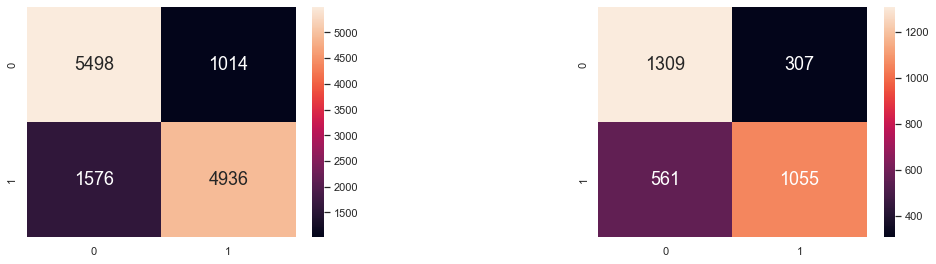

In [149]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train_bal)
y_test_pred = rforest.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", rforest.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", rforest.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

In [150]:
print(classification_report(y_test_bal, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1616
           1       0.77      0.65      0.71      1616

    accuracy                           0.73      3232
   macro avg       0.74      0.73      0.73      3232
weighted avg       0.74      0.73      0.73      3232



---

### Model 3: Logistic Regression

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.5375460687960688			 Model Accuracy :	  0.5099009900990099
True Positive Rate :	 0.5535933660933661			 True Positive Rate :	  0.49195544554455445
True Negative Rate :	 0.5214987714987716			 True Negative Rate :	  0.5278465346534653

False Positive Rate :	 0.4785012285012285			 False Positive Rate :	  0.47215346534653463
False Negative Rate :	 0.44640663390663393			 False Negative Rate :	  0.5080445544554455


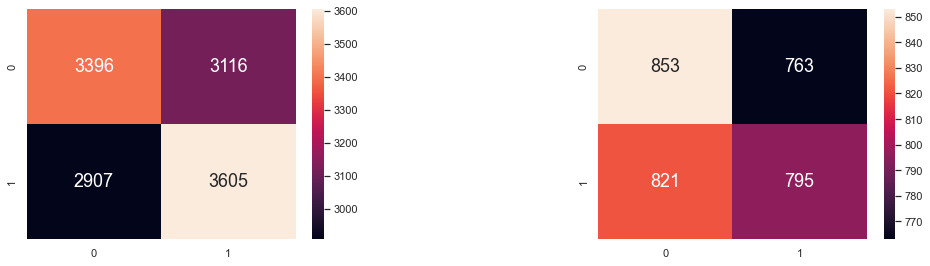

In [151]:
logreg = LogisticRegression()
logreg.fit(X_train_bal,y_train_bal.GOOD_OR_BAD_CLIENT.ravel())

# Predict the Response corresponding to Predictors
y_train_pred = logreg.predict(X_train_bal)
y_test_pred = logreg.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", logreg.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", logreg.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

In [152]:
print(classification_report(y_test_bal, y_test_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1616
           1       0.51      0.49      0.50      1616

    accuracy                           0.51      3232
   macro avg       0.51      0.51      0.51      3232
weighted avg       0.51      0.51      0.51      3232



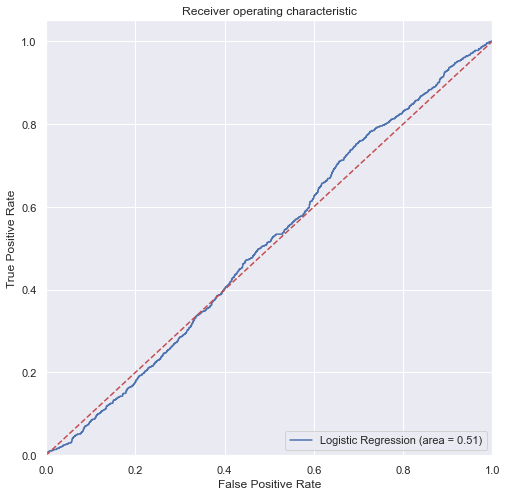

In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_bal, logreg.predict(X_test_bal))
fpr, tpr, thresholds = roc_curve(y_test_bal, logreg.predict_proba(X_test_bal)[:,1])
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

---

### Model 4: XGBoost Classification

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.8770730958230958			 Model Accuracy :	  0.833230198019802
True Positive Rate :	 0.7638206388206388			 True Positive Rate :	  0.7209158415841584
True Negative Rate :	 0.9903255528255528			 True Negative Rate :	  0.9455445544554455

False Positive Rate :	 0.009674447174447175			 False Positive Rate :	  0.054455445544554455
False Negative Rate :	 0.23617936117936117			 False Negative Rate :	  0.2790841584158416


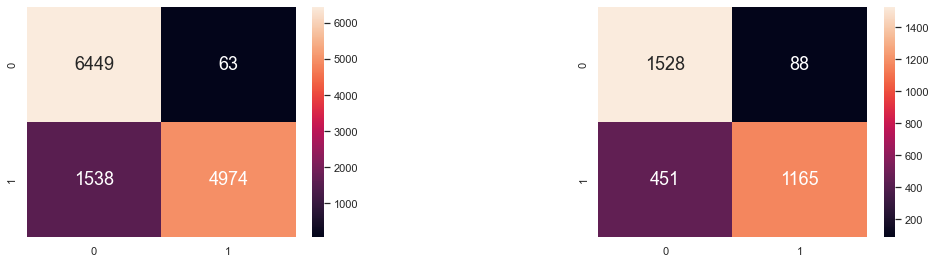

In [154]:
# importing required packages
from xgboost import XGBClassifier, plot_tree 
 
XGB_model = XGBClassifier() 
XGB_model.fit(X_train_bal,y_train_bal)

# Predict the Response corresponding to Predictors
y_train_pred = XGB_model.predict(X_train_bal)
y_test_pred = XGB_model.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", XGB_model.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", XGB_model.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

In [155]:
print(classification_report(y_test_bal, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1616
           1       0.93      0.72      0.81      1616

    accuracy                           0.83      3232
   macro avg       0.85      0.83      0.83      3232
weighted avg       0.85      0.83      0.83      3232



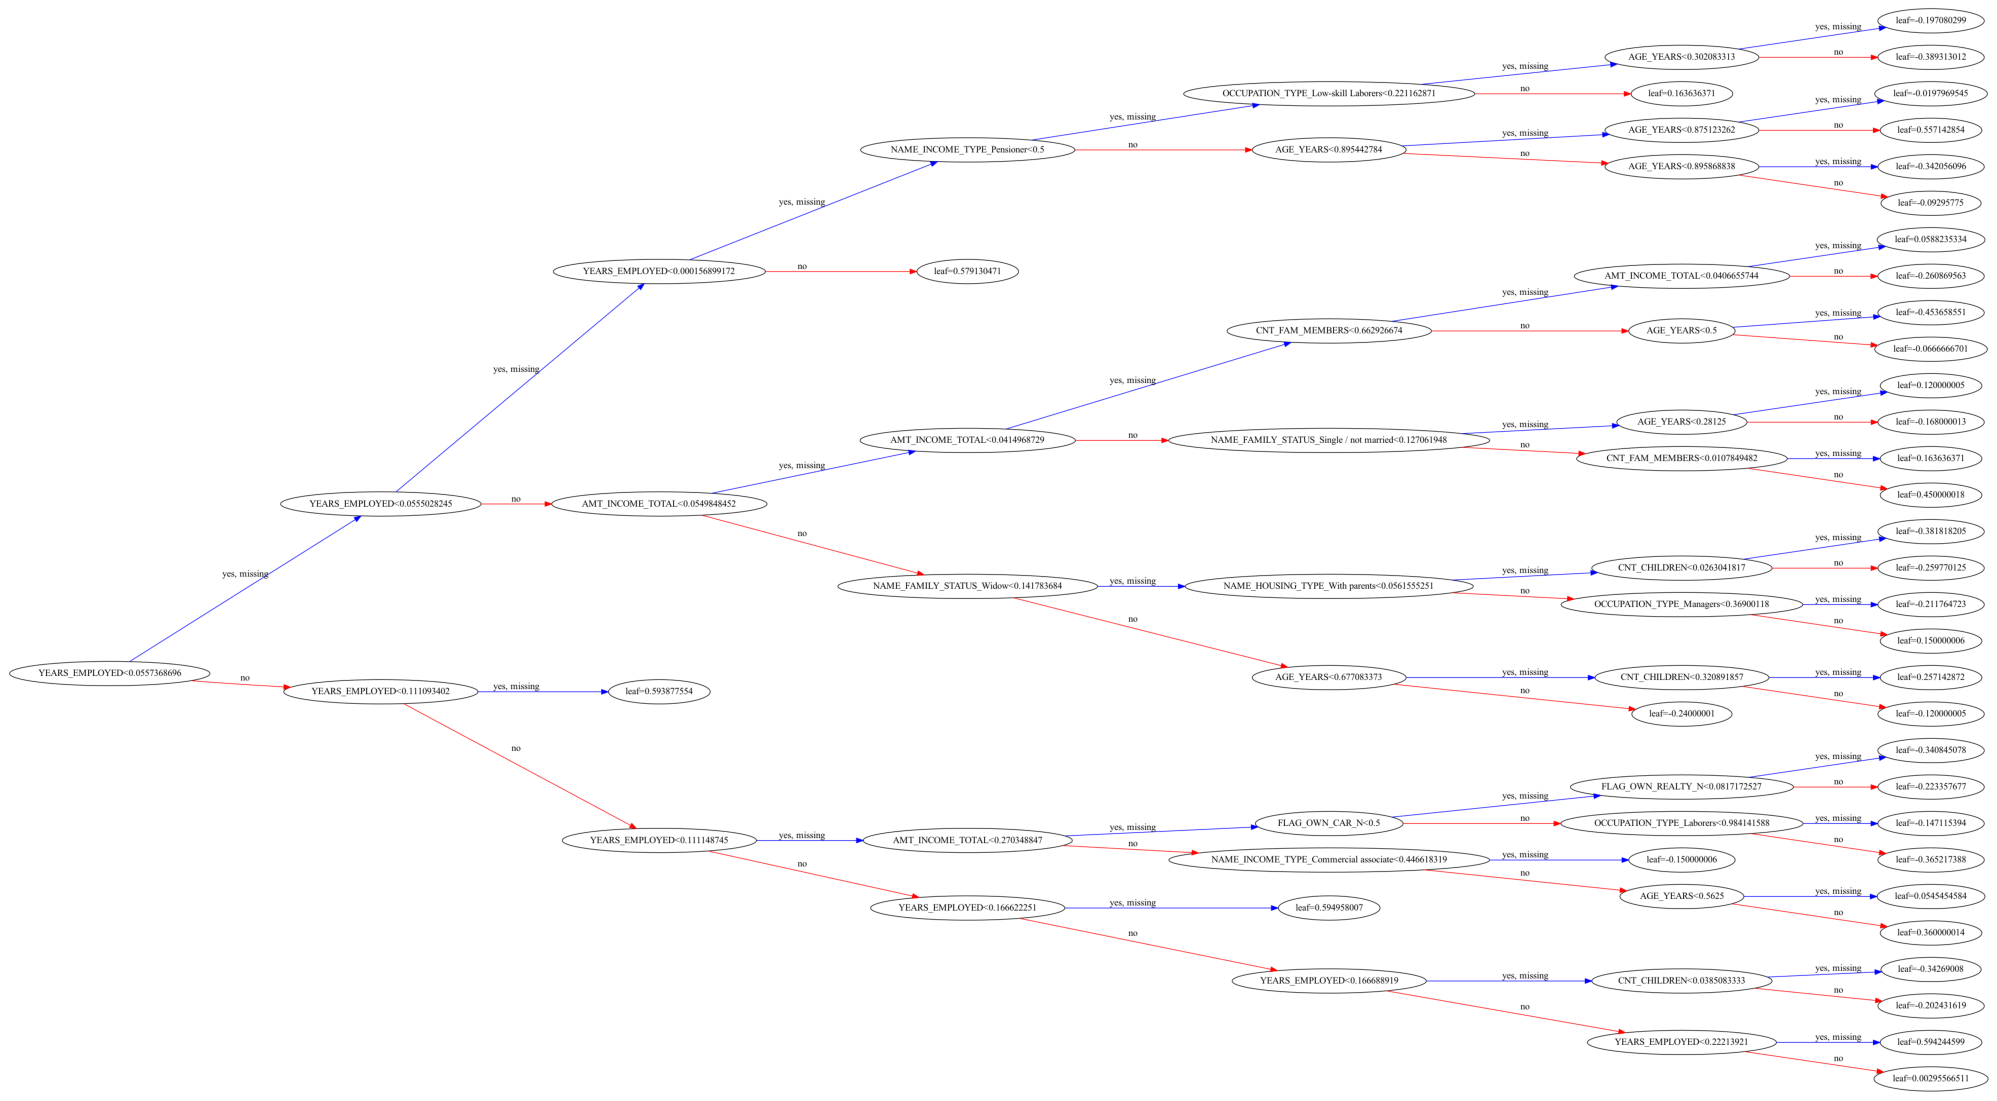

In [156]:
# plotting classification tree at index 0
fig, ax = plt.subplots(figsize=(50,20))
xgb.plot_tree(XGB_model, num_trees=0,ax=ax, rankdir='LR'); plt.show()

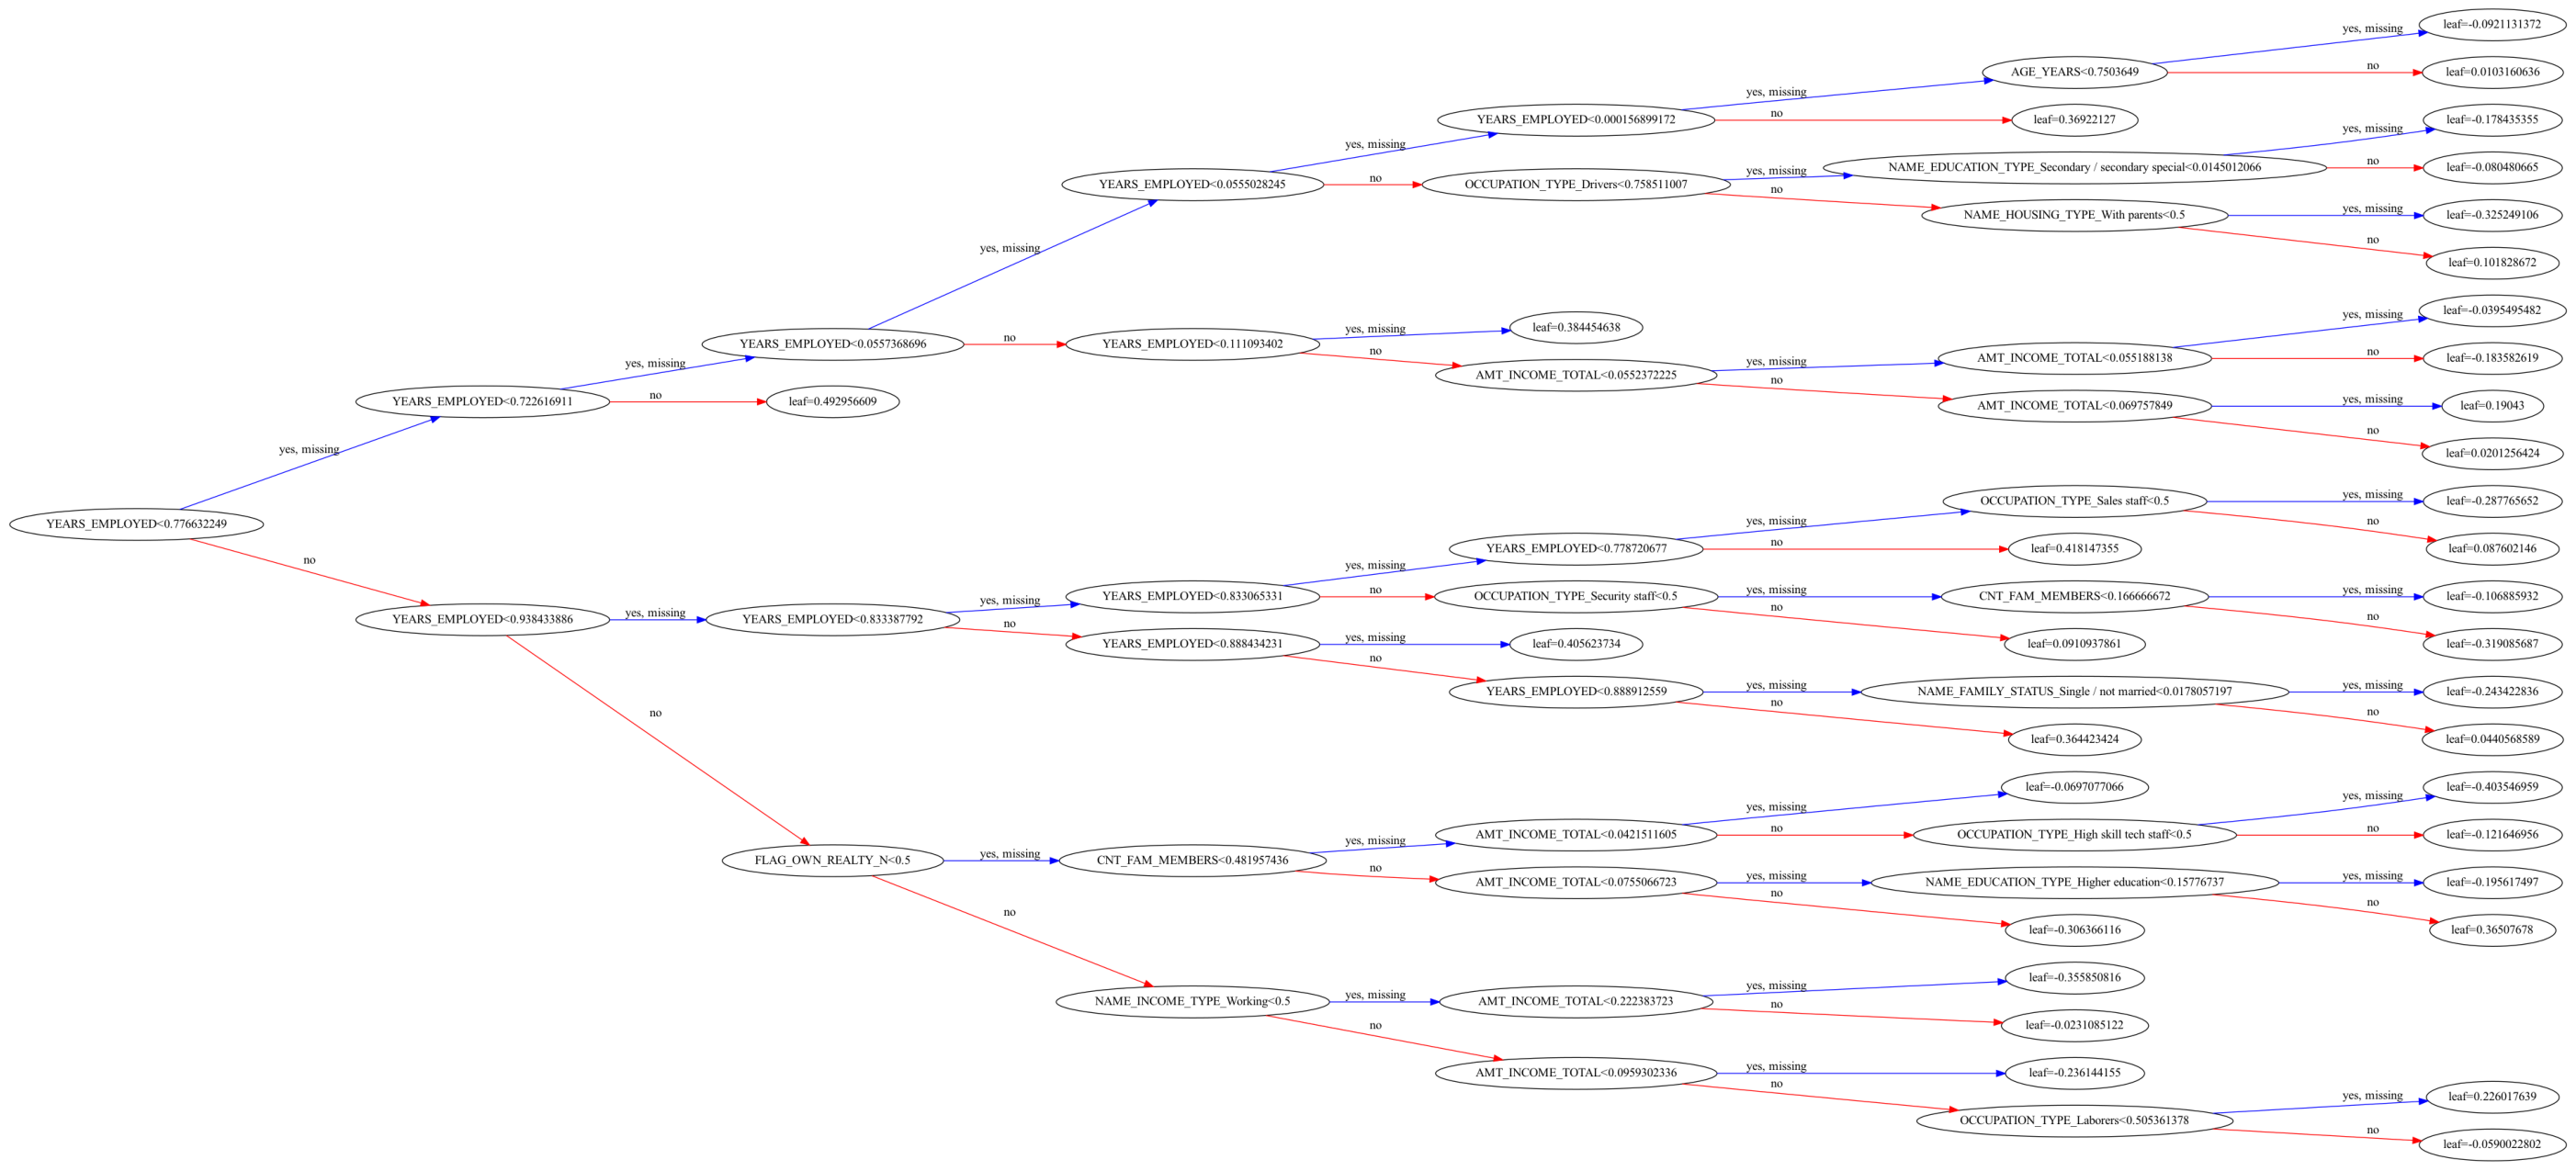

In [157]:
# plotting classification tree at index 4
fig, ax = plt.subplots(figsize=(50,65))
xgb.plot_tree(XGB_model, num_trees=4, ax=ax, rankdir='LR')
plt.show()

### XGBoost Classification after Grid Search Cross Validation

In [158]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(XGBClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train_bal, y_train_bal.GOOD_OR_BAD_CLIENT.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [159]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.8492112238369435


In [160]:
# Best max_depth = 2 and n_estimators = 500

===== Goodness of Fit of Model : Train Dataset ===== 		 ===== Goodness of Fit of Model : Test Dataset =====
Model Accuracy :	 0.8629453316953317			 Model Accuracy :	  0.8517945544554455
True Positive Rate :	 0.7320331695331695			 True Positive Rate :	  0.7178217821782178
True Negative Rate :	 0.9938574938574939			 True Negative Rate :	  0.9857673267326733

False Positive Rate :	 0.006142506142506142			 False Positive Rate :	  0.014232673267326733
False Negative Rate :	 0.26796683046683045			 False Negative Rate :	  0.28217821782178215


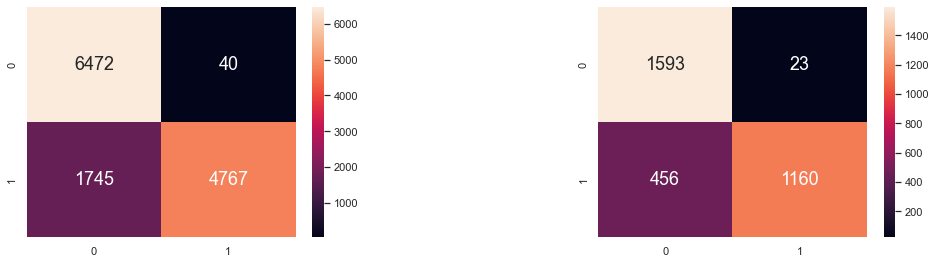

In [161]:
XGB_model = XGBClassifier(max_depth = 2,
                          n_estimators = 500) 
XGB_model.fit(X_train_bal,y_train_bal)

# Predict the Response corresponding to Predictors
y_train_pred = XGB_model.predict(X_train_bal)
y_test_pred = XGB_model.predict(X_test_bal)


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train_bal, y_train_pred)
cmTest = confusion_matrix(y_test_bal, y_test_pred)

tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0]

# Print the Goodness of fit for both train and test models
print("===== Goodness of Fit of Model : Train Dataset ===== \t\t ===== Goodness of Fit of Model : Test Dataset =====")
print("Model Accuracy :\t", XGB_model.score(X_train_bal, y_train_bal), end = "")
print("\t\t\t Model Accuracy :\t ", XGB_model.score(X_test_bal, y_test_bal))
print("True Positive Rate :\t", (tpTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t True Positive Rate :\t ", (tpTest/(tpTest + fnTest)))
print("True Negative Rate :\t", (tnTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t True Negative Rate :\t ", (tnTest/(tnTest + fpTest)))
print()

print("False Positive Rate :\t", (fpTrain/(tnTrain + fpTrain)), end = "")
print("\t\t\t False Positive Rate :\t ", (fpTest/(fpTest + tnTest)))
print("False Negative Rate :\t", (fnTrain/(tpTrain + fnTrain)), end = "")
print("\t\t\t False Negative Rate :\t ", (fnTest/(fnTest + tpTest)))
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.05, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.5)
sb.heatmap(confusion_matrix(y_train_bal, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test_bal, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
showfliers = False

### K-Fold Cross Validation

In [162]:
kfold = KFold(4)
kfold_score = []
result1 = np.mean(cross_val_score(logreg,features,label.GOOD_OR_BAD_CLIENT.ravel(),cv=kfold))*100
result2 = np.mean(cross_val_score(dectree,features,label.GOOD_OR_BAD_CLIENT.ravel(),cv=kfold))*100
result3 = np.mean(cross_val_score(rforest,features,label.GOOD_OR_BAD_CLIENT.ravel(),cv=kfold))*100
result4 = np.mean(cross_val_score(XGB_model,features,label.GOOD_OR_BAD_CLIENT.ravel(),cv=kfold))*100
kfold_score.extend([result1,result2,result3,result4])

In [163]:
col = ['LogisticRegression','DecisionTree','RandomForest','XGBoost']
counter = 0
while (counter < 4):
    print(col[counter] + ": The cross validation score is " + str(kfold_score[counter]))
    counter += 1

LogisticRegression: The cross validation score is 78.6073500967118
DecisionTree: The cross validation score is 78.57833655705997
RandomForest: The cross validation score is 78.6073500967118
XGBoost: The cross validation score is 78.43326885880077


### Derived Conclusion
As we have seen from the 4 different Machine Learning models that we have implemented, <u>XGBoost has the highest Model accuracy of 83.0%</u> (with high True Positive Rate and True Negative Rate), hence we will use XGBoost for our prediction of our selected predictors from our above analysis

<hr style="border:2px solid gray"> </hr>

## Extra Improvements : Using XGBoost to determine the best Predictors for our Response

### Problem:
- We want to figure out which predictor has the largest impact on "GOOD_OR_BAD_CLIENT"
- As shown previously, measuring each variable to get an analysis is not a good estimate
- Hence, we are going to try to drop every single variable and do predictions on the remaining ones (Using Recursive Feature Elimination)
- We then can derive the predictors giving the best cross validation score

In [165]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

target_df = X_train_bal.copy()
cols = list(target_df.columns)
XGB_model = XGBClassifier(max_depth = 2,
                          n_estimators = 500) 
rfe = RFE(XGB_model)

X_rfe = rfe.fit_transform(X_train_bal,y_train_bal.GOOD_OR_BAD_CLIENT.ravel())

XGB_model.fit(X_rfe,y_train_bal)
temp_df = pd.Series(rfe.support_,index=cols)
selected_features = temp_df[temp_df==True].index
print(rfe.ranking_) # gives the ranking of all the variables, 1 being the most important
print(selected_features) # prints out the columns which are the most important

[ 1  1  1  1  1  1 22  1 21  1 25  1  2  1 23 12 26  4  1  1  1  1  1  1
  1  6 18  1  1 20 27 17  8  9  7  1  5 14  1 19  1 10  1 13  1 24  1 11
  3 15  1 16]
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'CODE_GENDER_F', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_REALTY_N', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_State servant',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment', 'OCCUPATION_TYPE_Core staff',
       'OCCUPATION_TYPE_High skill tech staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Managers', 'OCCUPATION_TYPE_Private service staff',
  

### Comments: 
From the above, we can see that the following variables have the highest importance affecting the accuracy of the model:
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AGE_YEARS
- YEARS_EMPLOYED
- NAME_FAMILY_STATUS

The rest of the variables are not a good estimate even though they are in the list as not all type of each variable are being included in the list 


<hr style="border:2px solid gray"> </hr>

## Conclusion

Data Driven Insights and Interesting Concepts
- SMOTE
    - Given that our data was extremely imbalanced with most of our clients being classified as a 'good client', most models did not fit well initially. 
    - To solve this issue, we used the concept of SMOTE (Synthetic Minority Oversampling Technique). 
    - This allows additional points to be synthetically created which allows models to more effectively be trained to identify a 'bad client'
    
    
- K-fold cross validation
    - It can be used to select the best parameters such as number of trees, depth of the tree, and the rate at which the gradient boosting learns. 

    
- Limits of Linear Regression -> Logistic Regression
    - In our course, we learnt that we can use linear regression to predict numerical and continuous response using the independent variables. 
    - However, the same cannot be said for categorical response. Hence, after some research online, we found out that we can use logistic regression to predict categorical response. 
    
    
- Limits of Decision Tree -> Random Forest
    - While decision trees are one of the most used models in predicting categorical variables, they may not return the model with the highest prediction accuracy. 
    - Hence, we use Random forest to ensure the prediction to be more accurate (i.e. higher prediction accuracy) 
    - This is done through an esemble learning method, which is operated by constructing a multitude of decision trees and return the mean prediction of the individual trees. 
    
    
- Limits of Decision Tree -> XGBoost
    - While decision trees are one of the most used models in predicting categorical variables, they often exhibit highly variable behaviour which may result in errors. 
    - Hence, we use boosting to ensure that the trees are built sequentially such that each subsequent tree will reduce the errors of the previous tree. 
    - In contrast to the Random Forest technique that we implemented earlier in which trees are grown to their maximum extent, XGBoost make uses of trees with fewer splits. Such small trees are easily comprehended and readble. 
    
    
- Outcome
    - After the various steps we have taken to answer our problem definition, we have found that the machine learning model best suit our dataset was XGBoost with a model accuracy of 83.3%
    - XGBoost would be very useful model for the banks to predict if a client were a good client or bad client; given the risks of client defaulting on their payments upon credit card which banks should consider prior to the approval of their credit cards.